# Food Sales Application

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Open the data file and study the general information.](#OpenData&GeneralInfo)
3. [Step 2. Carry out exploratory data analysis (EDA)](#EDA)
4. [Step 3. Build a model to predict user churn](#Model)
5. [Step 4. Create user cluster](#EventFunnel)
6. [Step 5. Come up with conclusions and basic recommendations on working with customers](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.                                            | 
|  **What we have**        | TOne of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.                    |
|  **Main question of project**  |  How do you know if a customer is no longer with you?                                                                            |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/aaa92c32-5b7b-4eec-8a13-d1e099ee0be2/sprints/5646/topics/f9207047-1e54-4a62-ba08-0390dda7e4d5/lessons/6d5ba27b-3801-455b-94c7-96dca20f7495/)                                                                                                                                               |
| **Datasets**             | [/datasets/gym_churn_us.csv](https://code.s3.yandex.net/datasets/gym_churn_us.csv)                                                                       |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [1]:
#!pip install scipy
#!pip install sklearn

In [2]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import plotly

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('max_colwidth', 400)

sns.set()

In [3]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
print('Plotly version package:', plotly.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Pandas version library: 0.25.1
Numpy version library: 1.19.5
Seaborn version library: 0.9.0
Plotly version package: 4.1.0
The scikit-learn version is 0.21.2.


In [4]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn_us.csv')

In [5]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [6]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [7]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [8]:
get_info(df_data)

Head:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                      

None

--------------------------------------------------------------------------------------------------------------
Describe:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,Avg_additional_charges_total,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,146.943728,4.322750,1.879020,1.767052
std,96.355602,4.191297,0.972245,1.052906
min,0.148205,1.000000,0.000000,0.000000
25%,68.868830,1.000000,1.180875,0.963003
50%,136.220159,1.000000,1.832768,1.719574
75%,210.949625,6.000000,2.536078,2.510336
max,552.590740,12.000000,6.023668,6.146783


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
gender,0,0.0
Near_Location,0,0.0
Partner,0,0.0
Promo_friends,0,0.0
Phone,0,0.0
Contract_period,0,0.0
Group_visits,0,0.0
Age,0,0.0
Avg_additional_charges_total,0,0.0
Month_to_end_contract,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(4000, 14)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * In dataset no missing values and no duplicated rows.

#### Step 2. Carry out exploratory data analysis (EDA) <a name="EDA"></a>

In [9]:
df_churn = df_data.groupby(['Churn']).mean()
df_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [10]:
df_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [11]:
#df_data_melt = df_data.melt(id_vars='Churn', var_name='')
#df_data_melt.head()

In [12]:
def plot_features(df, filter):
    for col in df.drop('Churn', axis = 1).columns:
        sns.set(style='dark')
        sns.set_style("whitegrid")
        plt.figure(figsize=(16,5))
        sns.distplot(df[df['Churn'] == filter][col], color='green', bins=25)
        plt.show()

Feature distributions for those who left (churn):


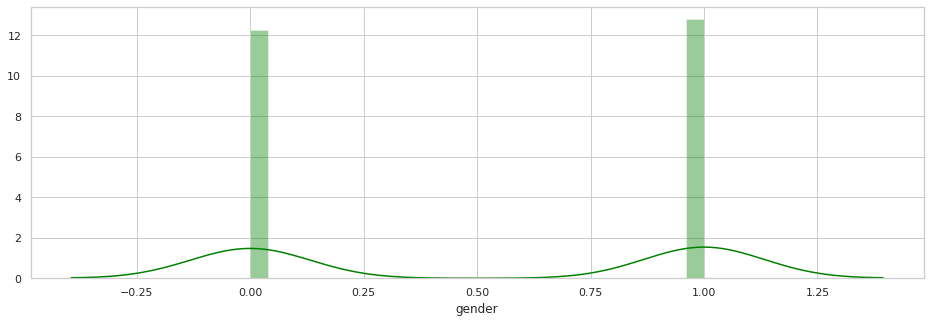

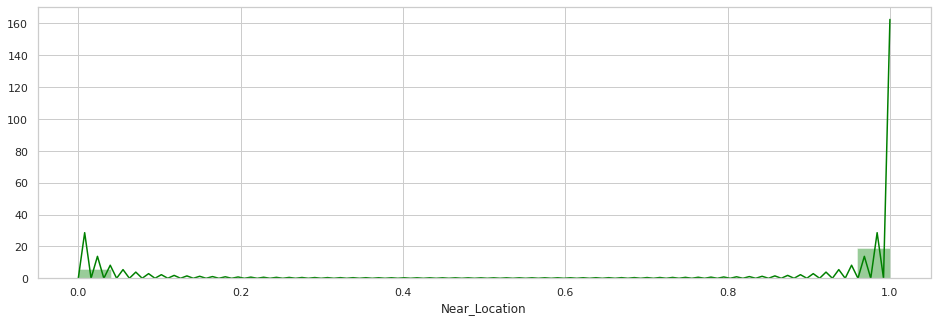

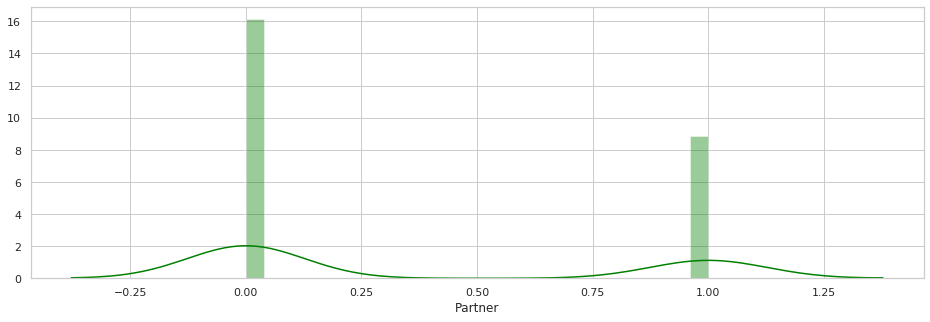

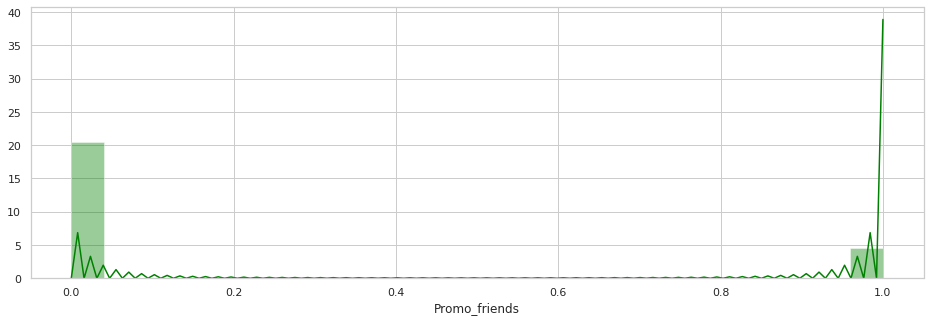

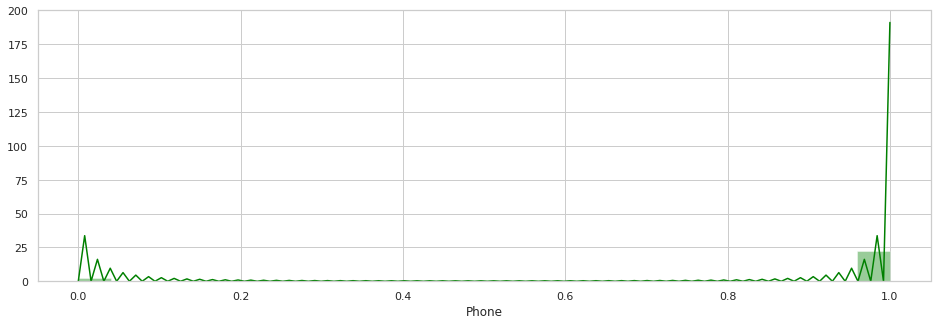

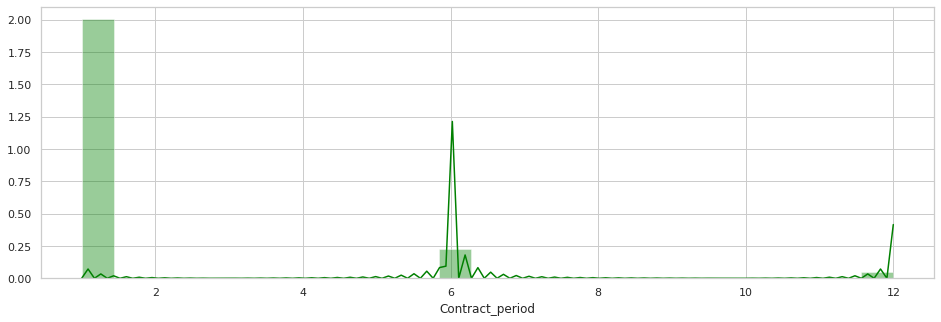

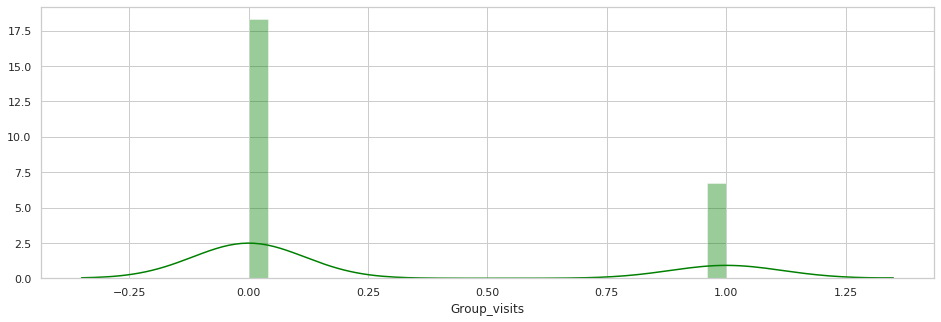

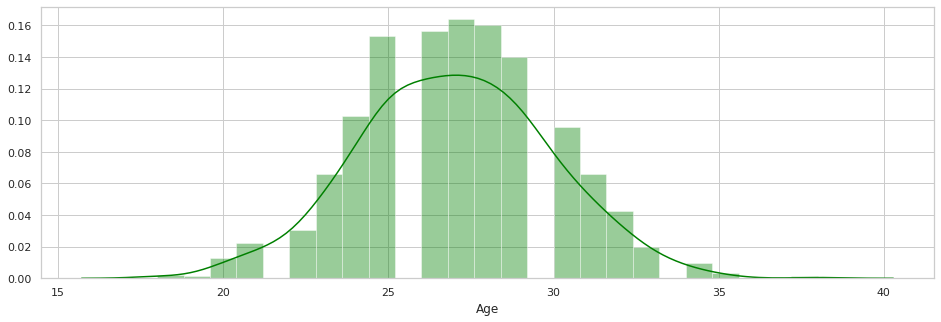

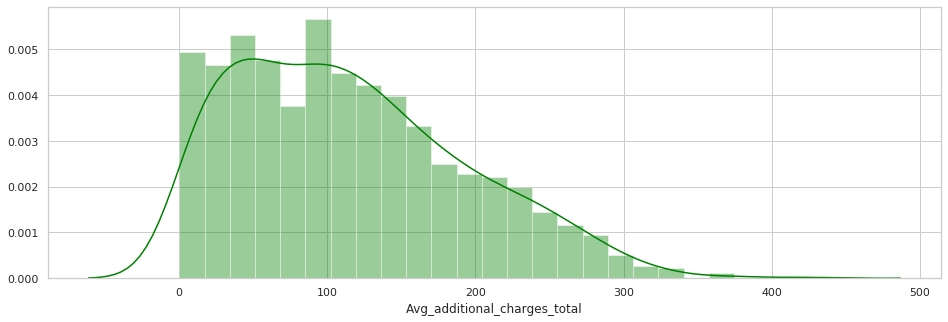

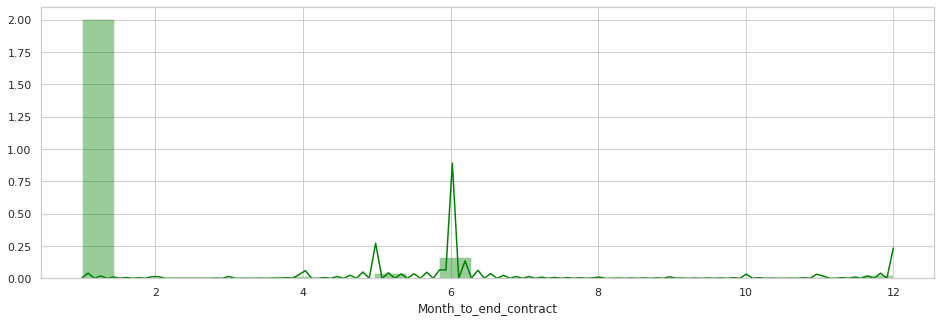

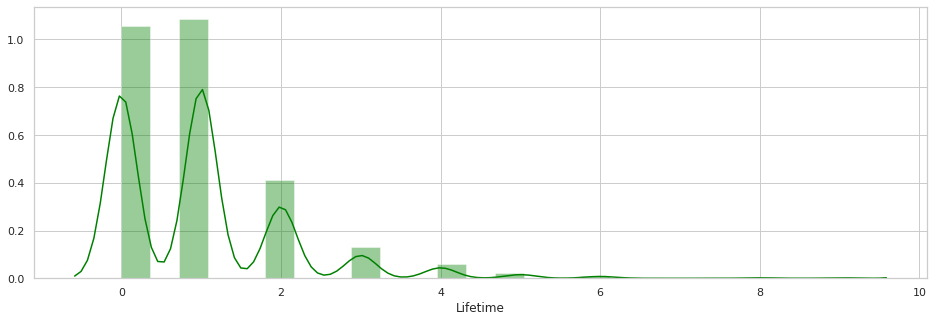

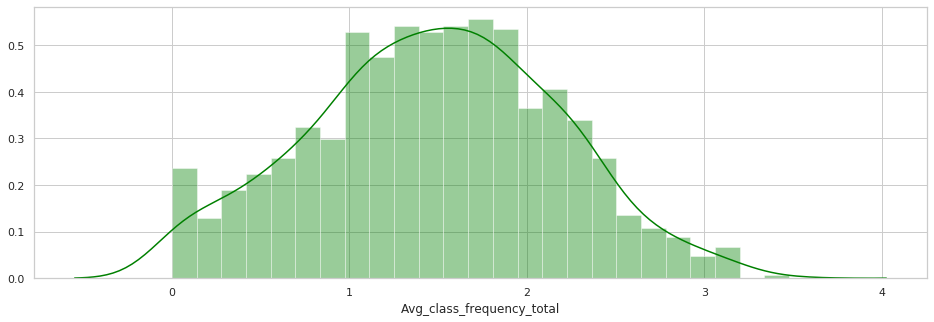

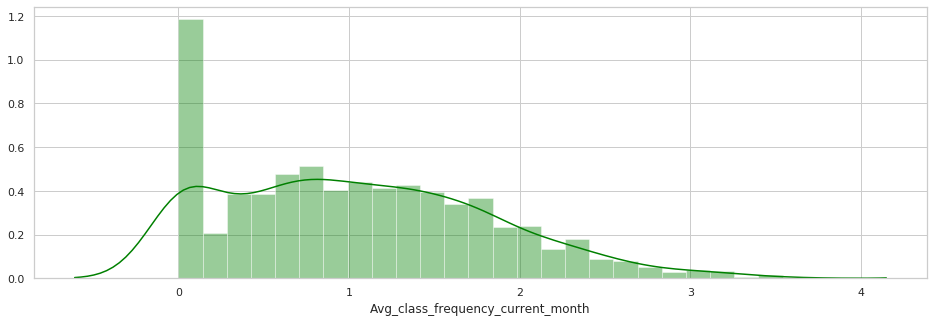

In [13]:
print('Feature distributions for those who left (churn):')
plot_features(df_data, 1)

Feature distributions for those who stay:


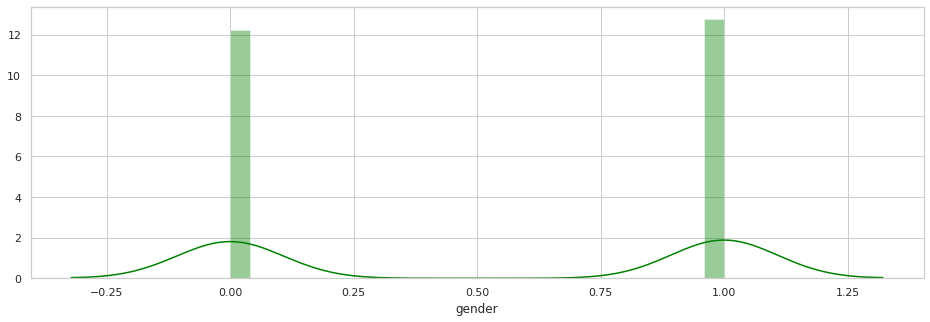

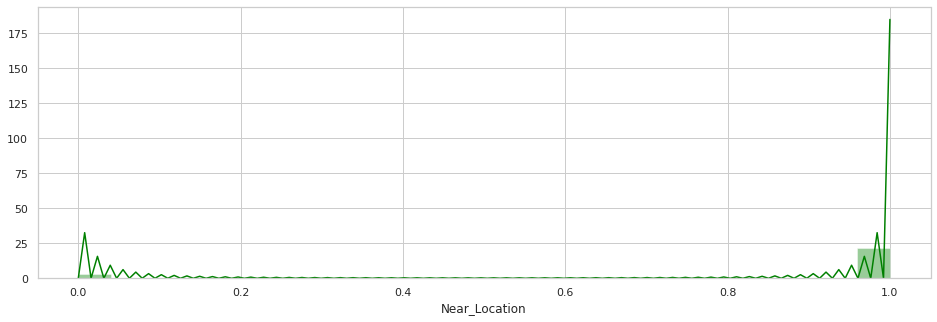

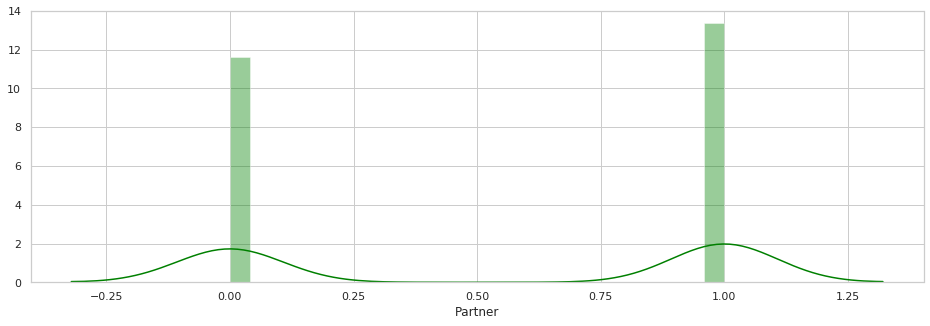

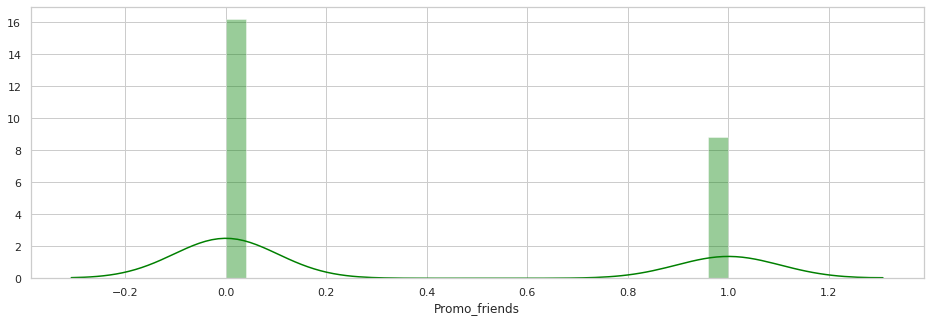

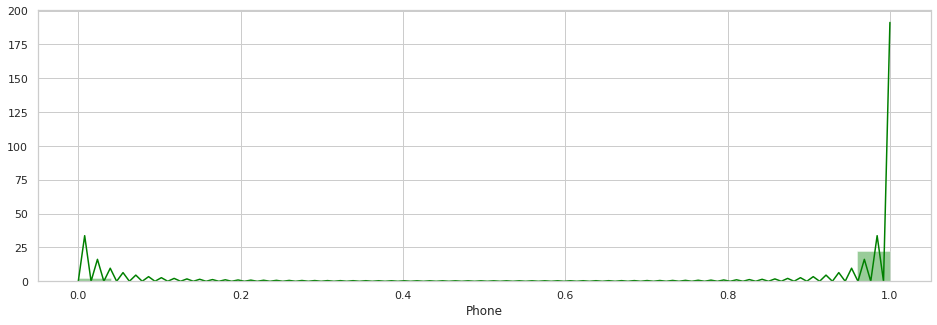

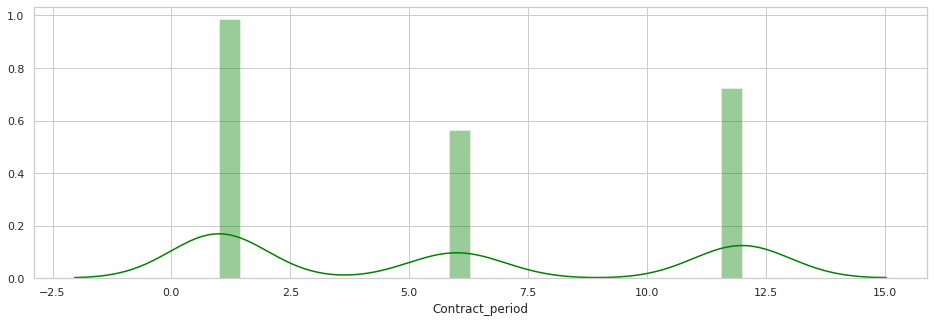

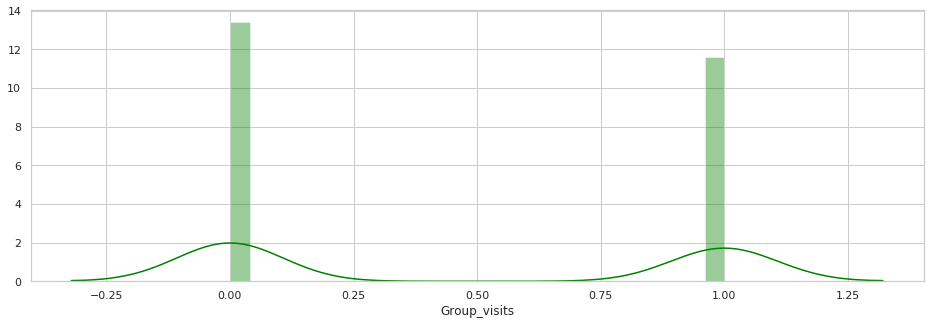

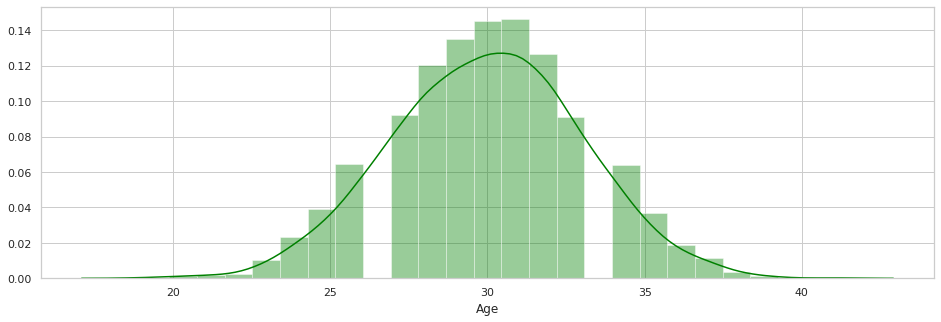

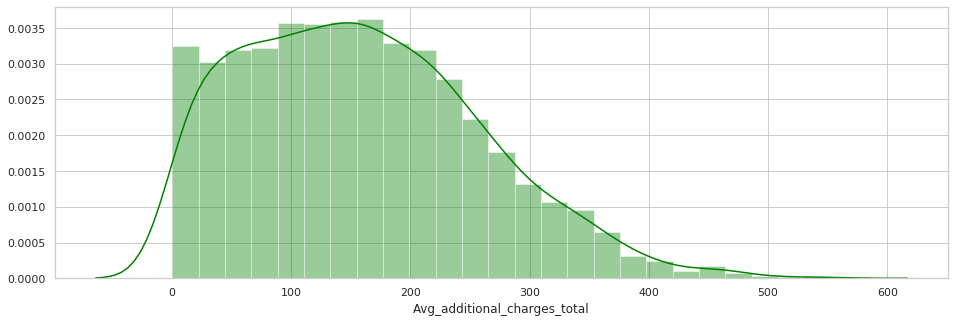

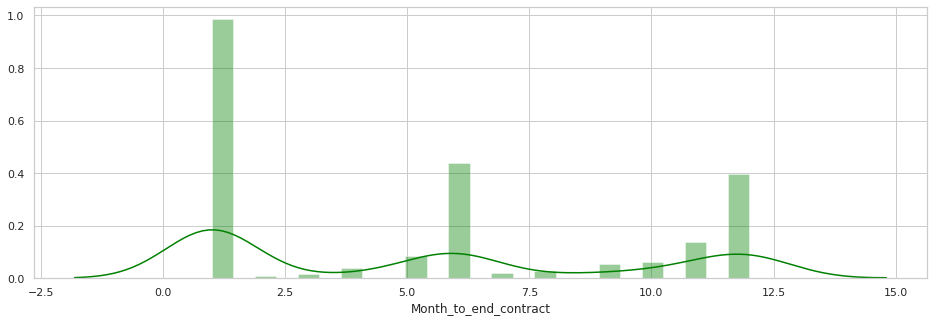

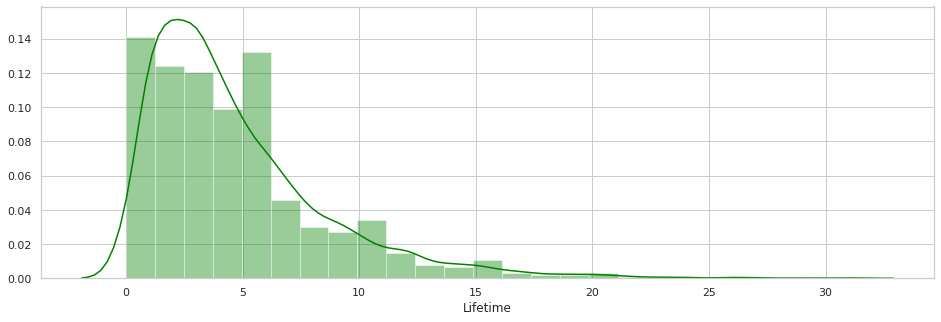

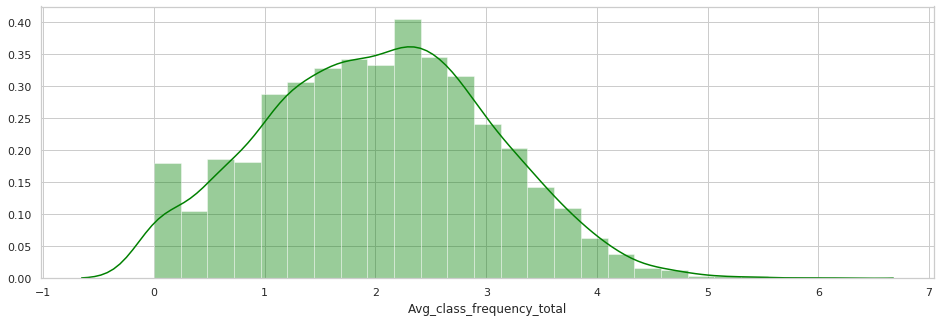

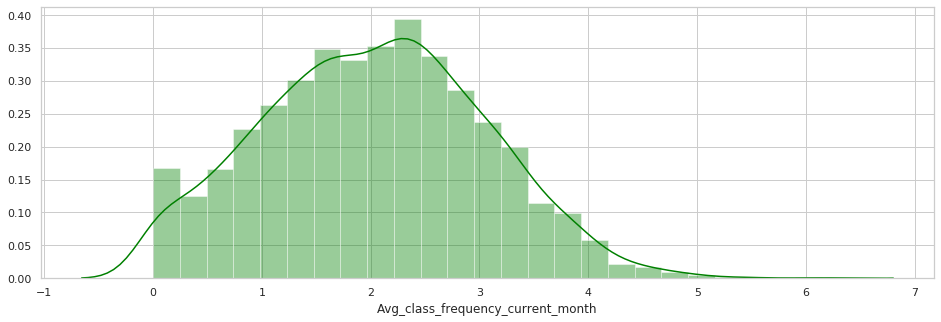

In [14]:
print('Feature distributions for those who stay:')
plot_features(df_data, 0)

> * Unfortunately, the project description does not say which gender is coded under the number 1 and 0. But among the users who stopped attending the gym, there were almost the same number of men and women. The situation is the same for those who stayed.
> * For the parameter 'Near_Location' the ratio is the same for those who left and for those who stayed. In both cases, there are more people for whom the gym is close.
> * Most of the users who left were not employees of partner companies.
> * The parameter of the 'Promo_friends', 'Phone', 'Group_visits' ratio is the same for those who stopped going to the gym and for those who are loyal.
> * For parameter 'Age' it is characteristic that people who left (churn) the gym were in the age group of 26-30 years old, and those who continue to visit the gym are 27-33 years old.
> * For those who stopped going to the gym, it is typical that people spent less money on other gym services - 'Avg_additional_charges_total'. Those who are loyal are much more.
> * 'Month_to_end_contract': the churn is characterized by a large number of people who have one month left before they stop going to the gym. For loyal users, a larger range of the remaining months until the end of the contract.
> * 'Lifetime': loyal users have a normal distribution from 0 to 15 months, churn is characterized by a short life cycle range from 0 to 2 months.
> * Average frequency of visits per week over the preceding month - 'Avg_class_frequency_current_month', for churn: 0-3 days per week and loyal: 0-4.5

In [15]:
corr_matrix = df_data.corr()

In [16]:
def draw_heat(df, title):
    sns.set(style='white')
    plt.figure(figsize=(18,10))
    sns.heatmap(
        df,
        annot=True,
        linecolor='green'
    )
    plt.title(title),
    plt.show()

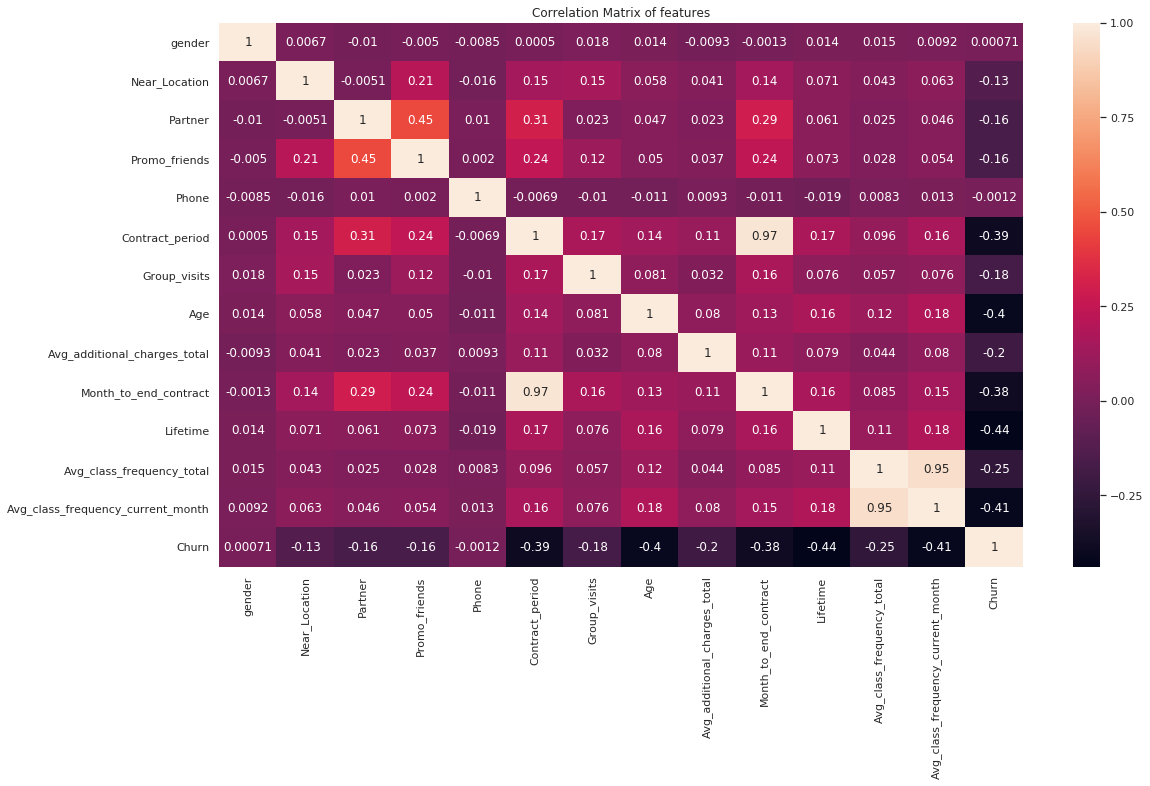

In [17]:
draw_heat(corr_matrix, 'Correlation Matrix of features')

> * The closest parameter for the churn parameter is the gender of visitors: 0.00071. 
> * The next parameters that can affect the churn are the parameter that the user left their phone number ("Phone") -0.0012 and the proximity of the fitness center ("Near_Location"): -0.13
> * The parameters are almost completely correlated with each other: (0.97-0.95)
 - the months remaining until the contract expires ('Month_to_end_contract') and 'Contract_period', 
 - average frequency of visits per week over the customer's lifetime ('Avg_class_frequency_total') and 'Avg_class_frequency_current_month'.
> * Slightly less connected: (0.45-0.29)
 - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership) ('Promo_friends') and whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers) ('Partner). 
 - 'Partner' and 'Contract_period'

#### Step 3. Build a model to predict user churn <a name="Model"></a>

In [18]:
X = df_data.drop('Churn', axis=1)
y = df_data['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
LR_pred = model.predict(X_test)
LR_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [22]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
RFC_pred = model2.predict(X_test)
RFC_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [24]:
print("Accuracy of Logistic Regression =", round(accuracy_score(y_test, LR_pred), 4))
print("Precicion of Logistic Regression =", round(precision_score(y_test, LR_pred), 4))
print("Recall of Logistic Regression =", round(recall_score(y_test, LR_pred), 4))

Accuracy of Logistic Regression = 0.925
Precicion of Logistic Regression = 0.8632
Recall of Logistic Regression = 0.8283


In [25]:
print("Accuracy of Random Forest =", round(accuracy_score(y_test, RFC_pred), 4))
print("Precicion of Random Forest =", round(precision_score(y_test, RFC_pred), 4))
print("Recall of Random Forest =", round(recall_score(y_test, RFC_pred), 4))

Accuracy of Random Forest = 0.9075
Precicion of Random Forest = 0.8333
Recall of Random Forest = 0.7828


> * The best results are shown by the Logistic Regression model. This method has the best all indicators - accuracy, precicion and recall. 

#### Step 4. Create user cluster <a name="UserCluster"></a>

In [26]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

In [27]:
distance_matrix = linkage(X_scale, method="ward")
distance_matrix

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

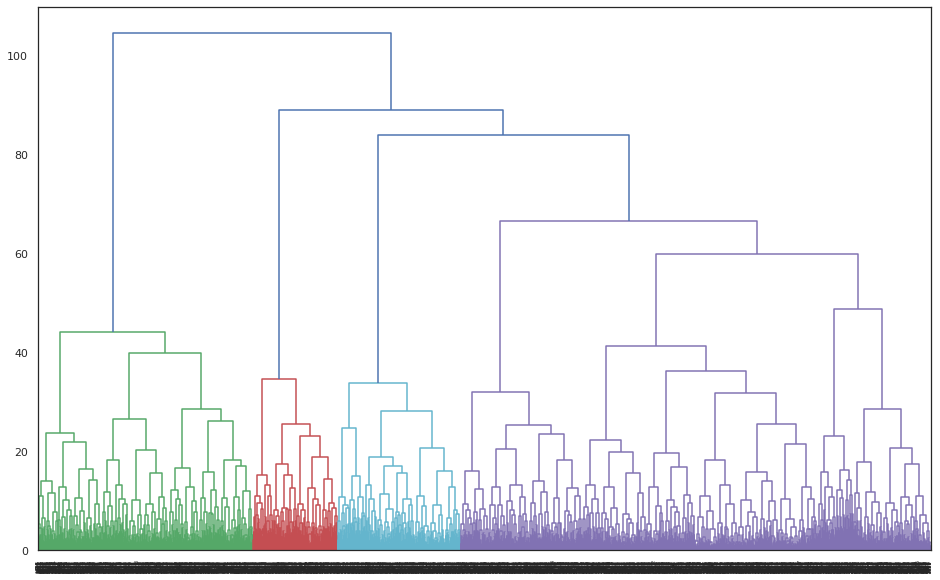

In [28]:
plt.figure(figsize=(16,10))
dendrogram(distance_matrix, orientation='top')
plt.show()

In [29]:
K_means = KMeans(n_clusters=5, random_state=0)
labels = K_means.fit_predict(X_scale)
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [30]:
df_data['km_cluster'] = labels
df_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,km_cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [31]:
clusters_features = df_data.groupby(['km_cluster']).mean().reset_index()
clusters_features.head()

,km_cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [32]:
#df_melt = clusters_features.melt(['km_cluster'], var_name='cols',  value_name='vals')

In [33]:
#df_melt = clusters_features.melt(['km_cluster'], var_name='cols',  value_name='vals')
#g = sns.FacetGrid(df_melt, 
#                  col='cols', 
#                  hue="km_cluster", 
#                  palette="Set1", 
#                  height=7, 
#                  margin_titles=True,
#                  sharex=False, 
#                  sharey=False)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.set(style='dark'),
#sns.set_style("whitegrid")
#g.map_dataframe(sns.distplot, 
#      "vals", 
#      hist=False,
#      rug=True)
#g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.add_legend()

In [34]:
#unique_vals = df_data['km_cluster'].unique()
#print(unique_vals)
#targets = [df_data.loc[df_data['km_cluster'] == val] for val in unique_vals]
#display(targets)
#for target in targets:
#    sns.set(style='dark')
#    sns.set_style("whitegrid")
#    plt.figure(figsize=(16,5))
#    print(target)
#    sns.distplot(target,rug=True, kde=True)
#    plt.show()

In [35]:
#dfm = clusters_features.melt(var_name='columns')
#sns.set(style='dark')
#sns.set_style("whitegrid")
#plt.figure(figsize=(16,5))
#g = sns.FacetGrid(dfm, col='columns')
#g = (g.map(sns.distplot, 'value'))
#plt.show()

In [36]:
clusters_features.head()

,km_cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


> * Based on dataframe we can conclude that:
- 'gender': in almost all clusters, the ratio of men to women is 50/50.
- 'Near_Location': in clusters 3,4,0,1, users indicated the proximity of the gym to home and work. Only in **cluster 2** for main part of users, the gym was far.
- 'Partner': **only in the 0 cluster**, the majority of users are employees of partner companies. In other clusters, this figure does not exceed 50%.
- 'Promo_friends': the *largest* number of users in **cluster 0**, the *smallest* in **cluster 2**.
- 'Phone': only in **cluster 1**, most users did not leave a phone number.
- 'Contract_period': **cluster 0** has the highest average of 10 months. Next, **cluster 1**: 4.7 months, **clusters 2, 3 and 4** are approximately the same.
- 'Group_visits': the best indicator is in **cluster 0**, the next **clusters are 1 and 4**, **clusters 3 and 2** complete the "three".
- 'Age': the highest average age, in **cluster 4** - (30 years), then **clusters 0 and 1** (29 years) and **clusters 2 and 3** (28 years).
- 'Avg_additional_charges_total': Most of the money for additional gym services is spent in **clusters 0 and 4** (USD 161-160 is the average bill). Least of all in **cluster 3** ($ 131).
- 'Month_to_end_contract': **cluster 0** - (9 months), **cluster 1** - (4.5 months), **clusters 2 and 4** (2.2-2.5 months), lowest **cluster 3** (1.9 months)
- 'Lifetime': **clusters 4 and 0** (4.8 and 4.7 months), **cluster 1** - 3.9 months, **clusters 2 and 3** - (2.4-2.8 months).
- 'Avg_class_frequency_total', 'Avg_class_frequency_current_month': **cluster 4** - (2.85-2.89), **cluster 0** - (1.96-1.98), **cluster 3** (1.2-1.0) - this is the lowest rate of workout visits per week and per month.
- 'Churn': **cluster 3** - almost 49% of users stop going to the gym. 

In [37]:
def plot_features_cluster(df, filter):
    for col in df.drop('km_cluster', axis = 1).columns:
        sns.set(style='dark')
        sns.set_style("whitegrid")
        plt.figure(figsize=(16,5))
        sns.distplot(df[df['km_cluster'] == filter][col], color='green', bins=25)
        plt.show()

Plot distributions of features for cluster 0


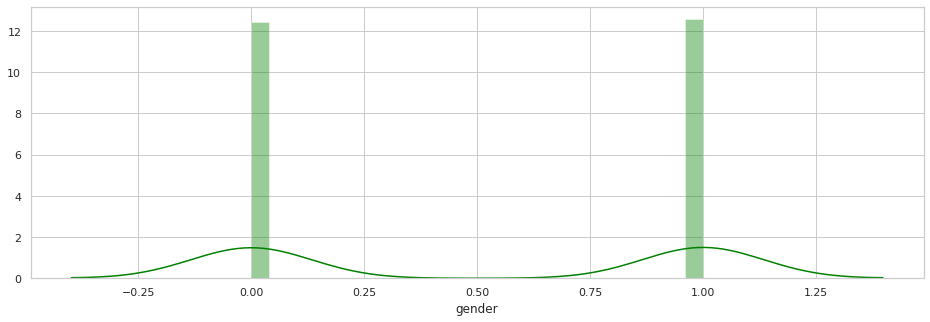

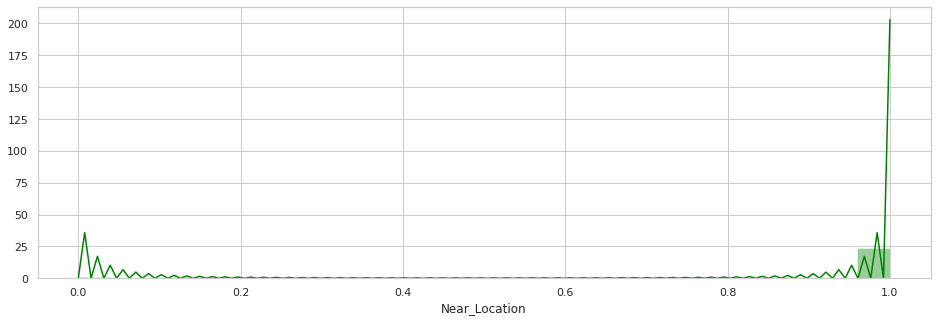

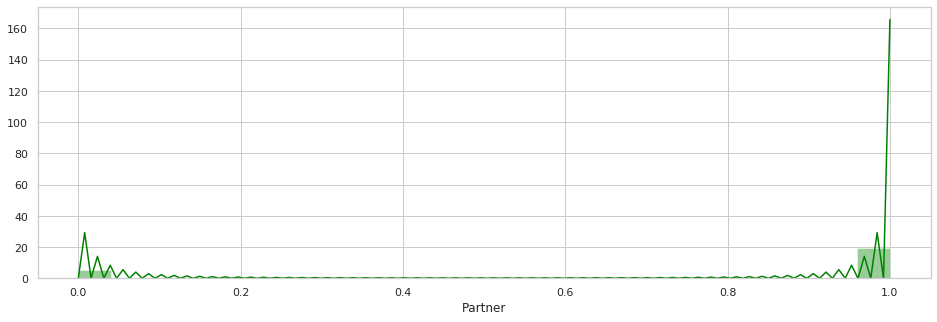

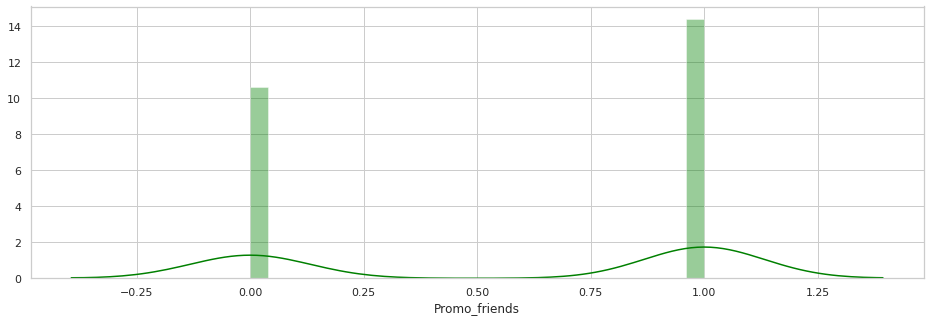

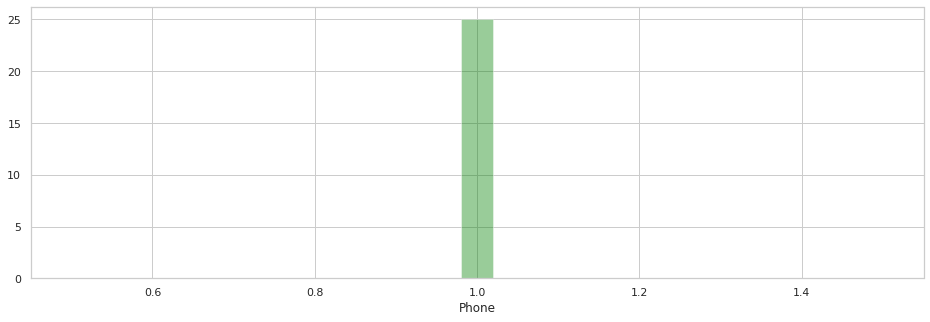

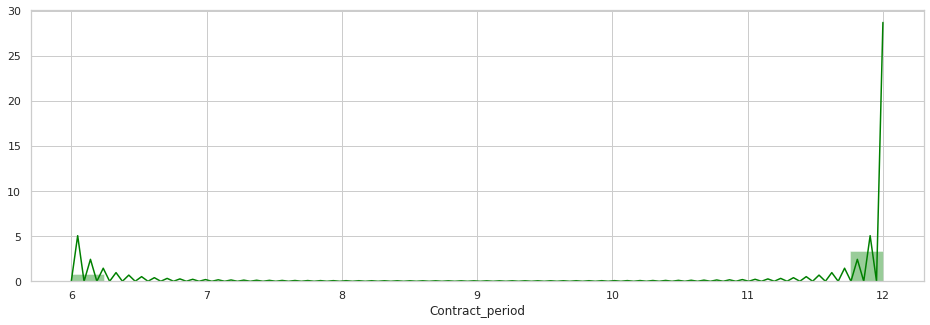

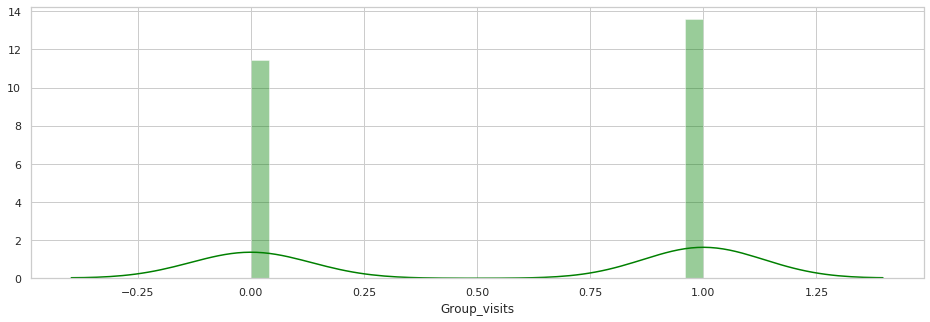

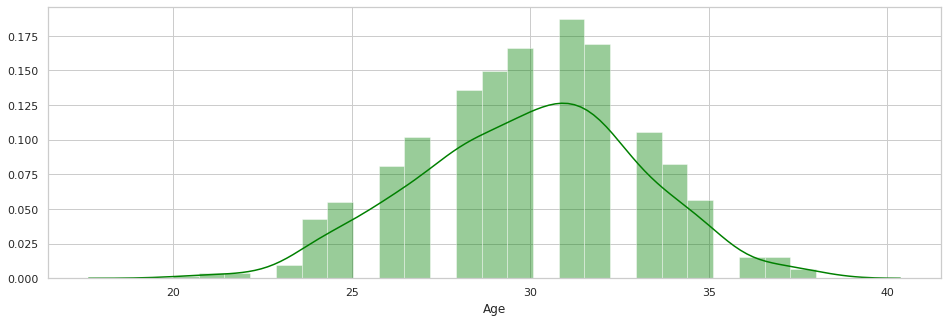

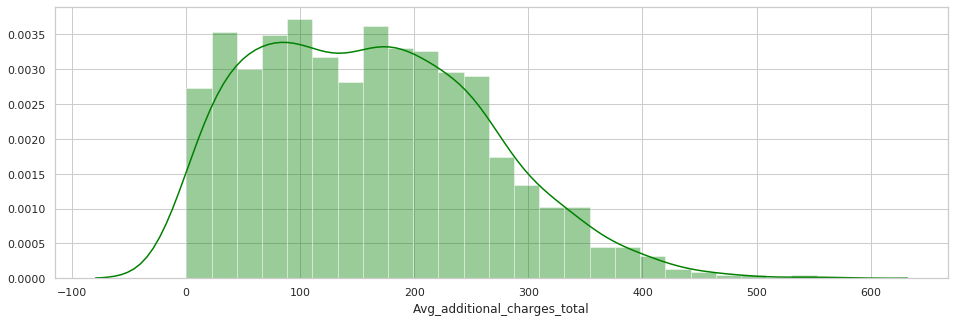

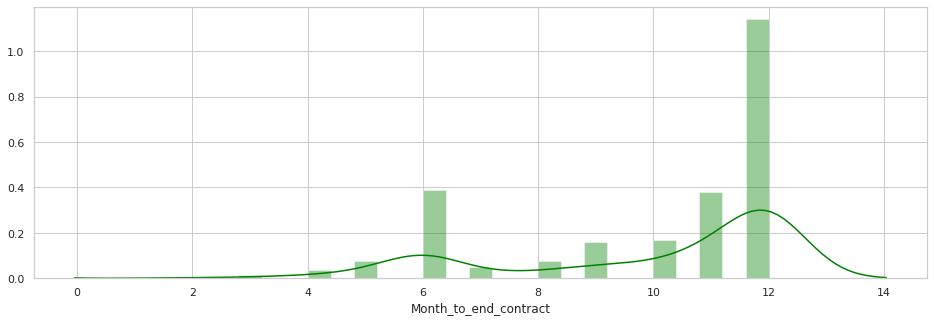

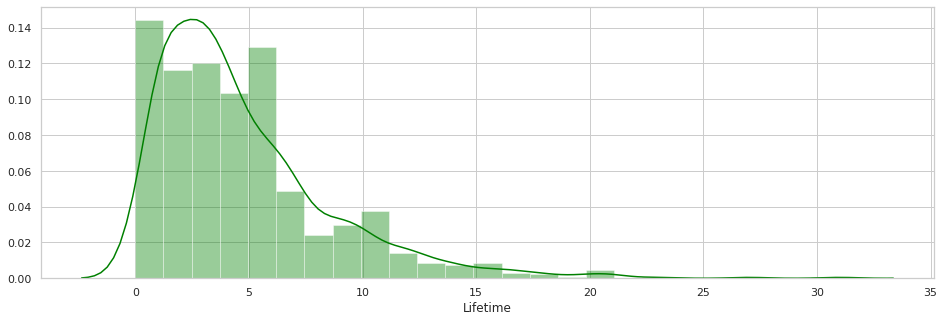

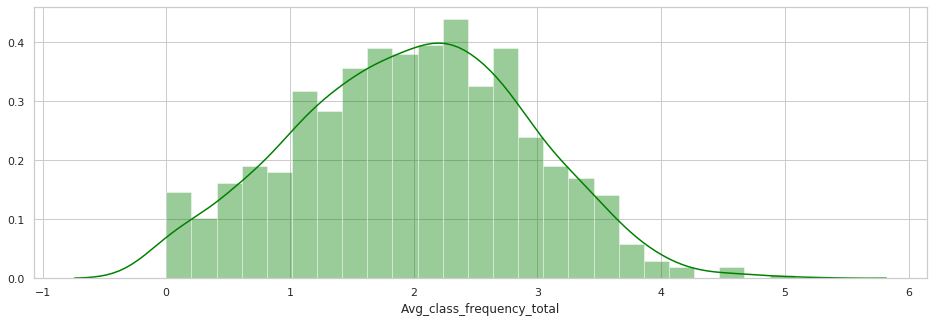

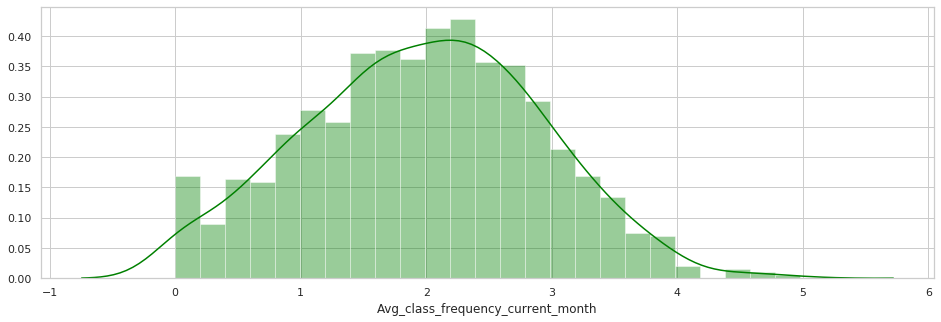

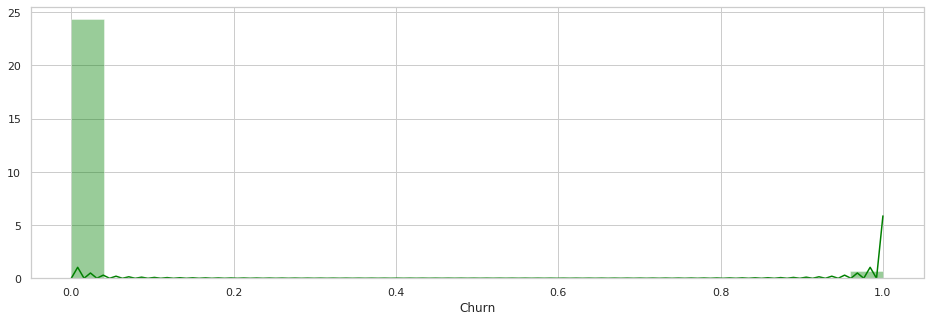

In [38]:
print('Plot distributions of features for cluster 0')
plot_features_cluster(df_data, 0)

Plot distributions of features for cluster 1


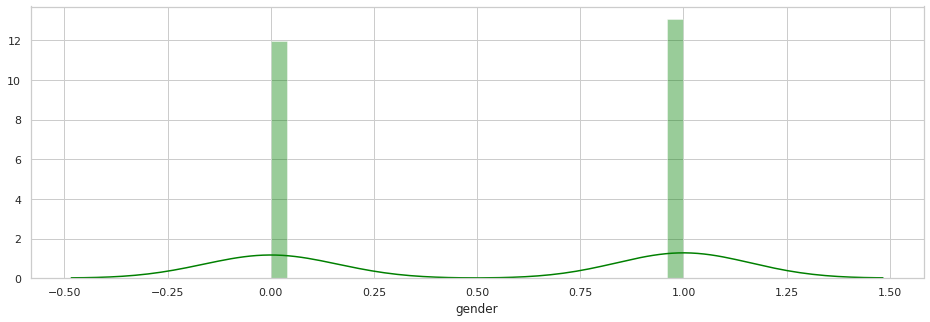

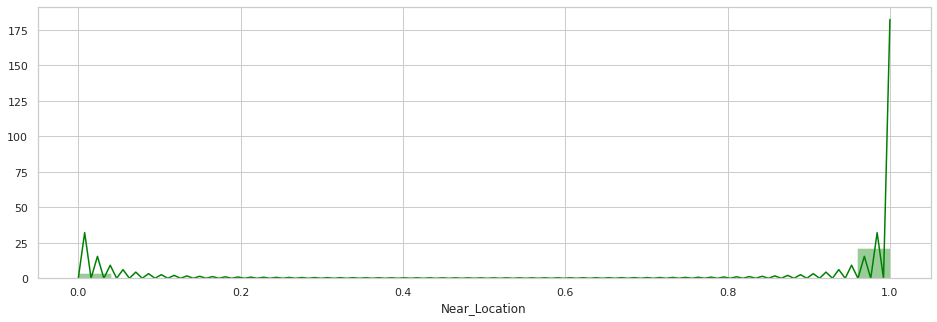

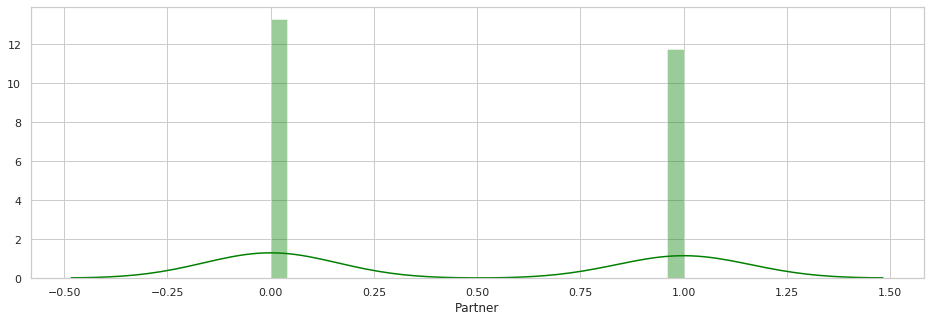

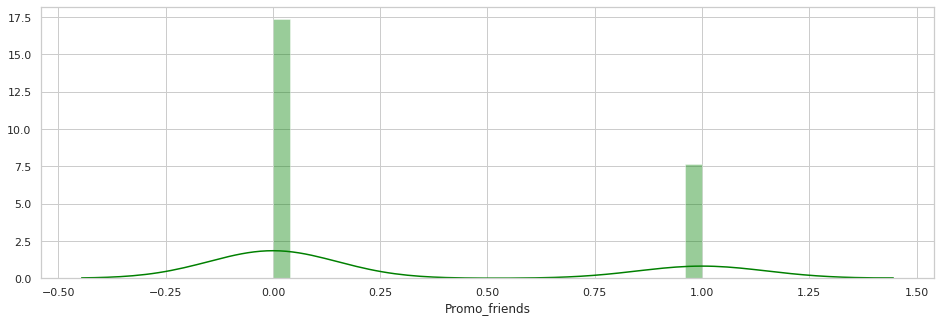

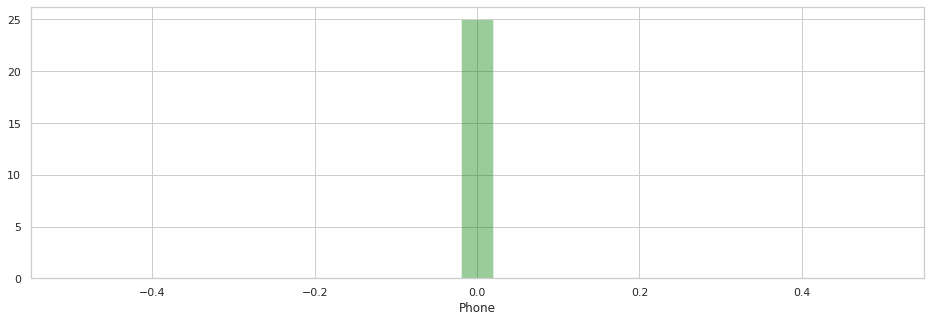

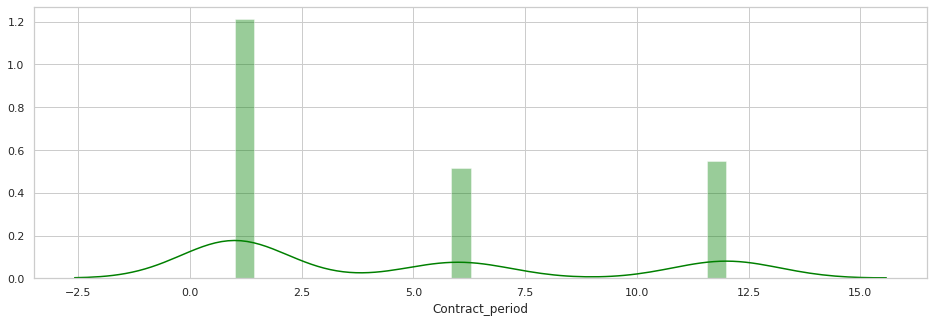

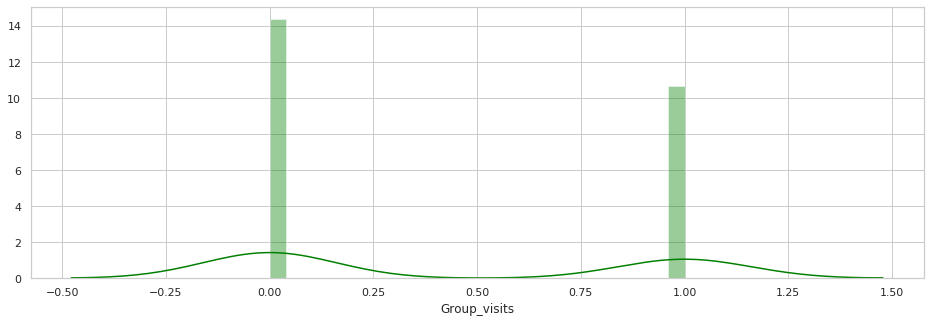

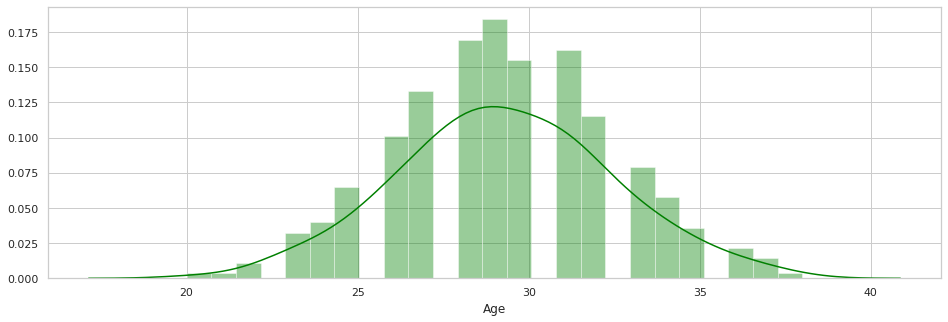

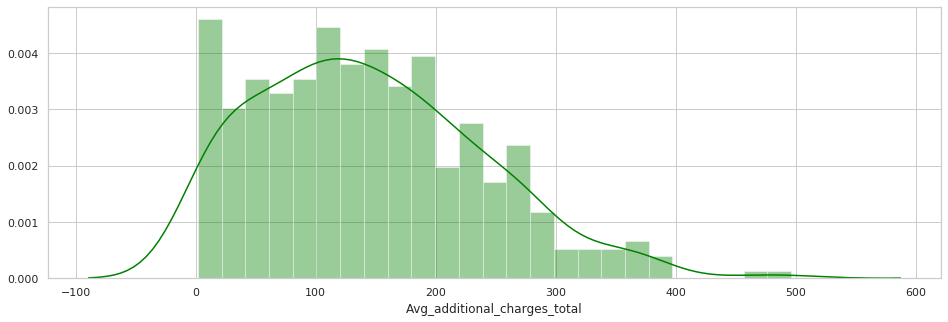

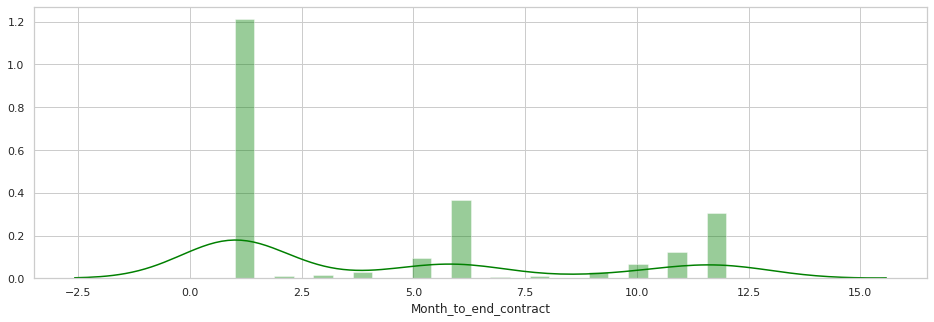

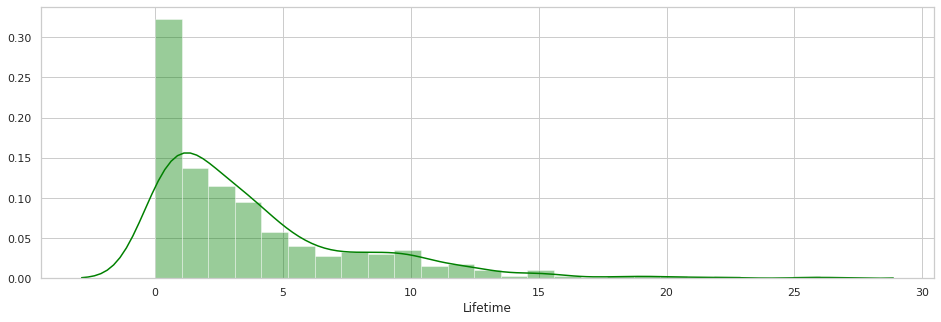

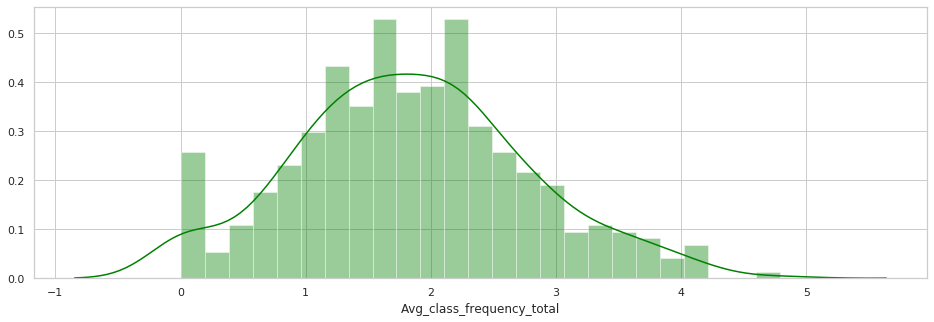

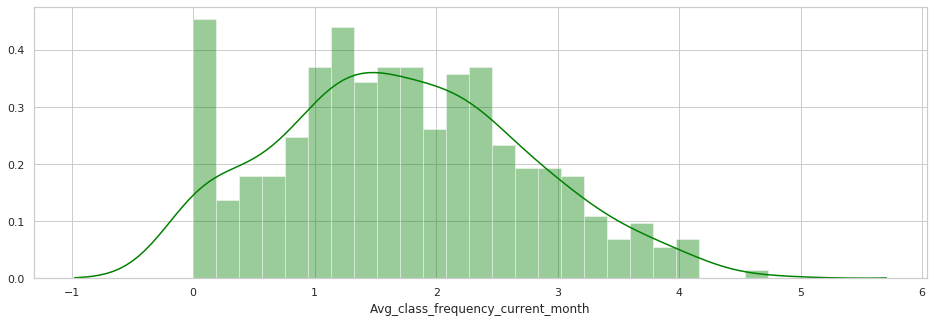

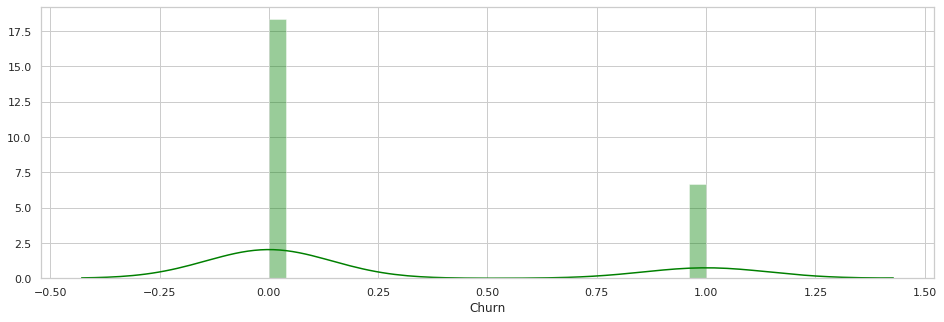

In [39]:
print('Plot distributions of features for cluster 1')
plot_features_cluster(df_data, 1)

Plot distributions of features for cluster 2


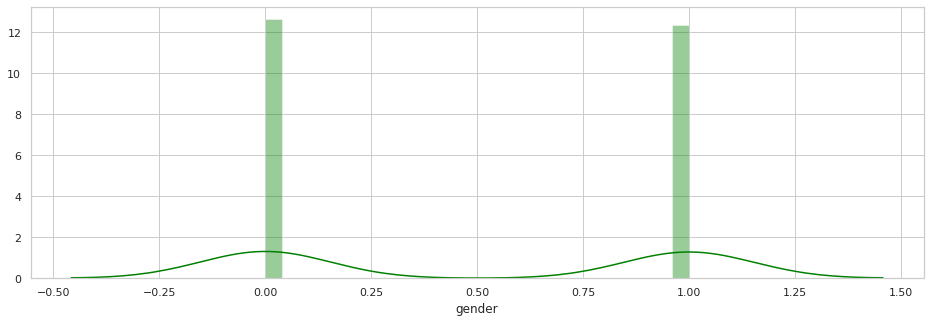

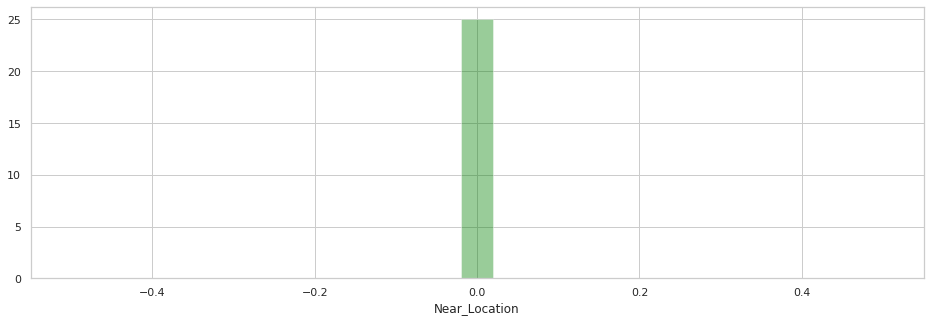

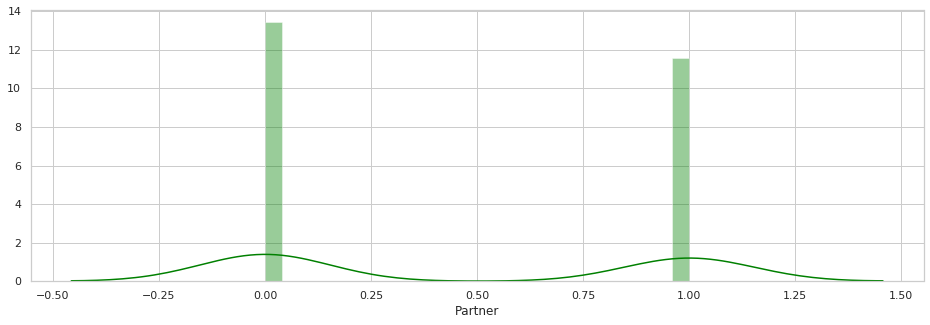

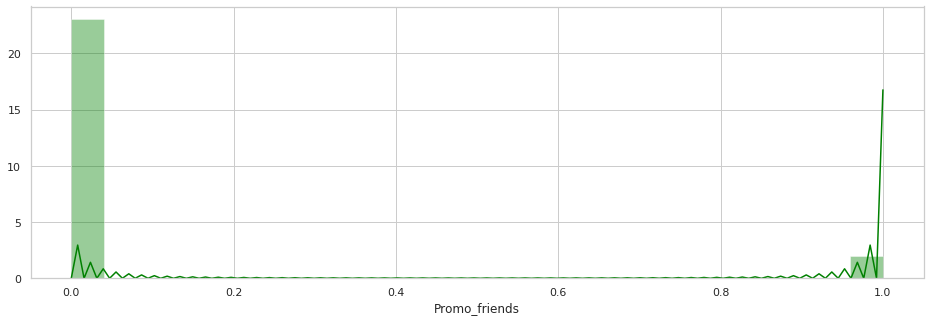

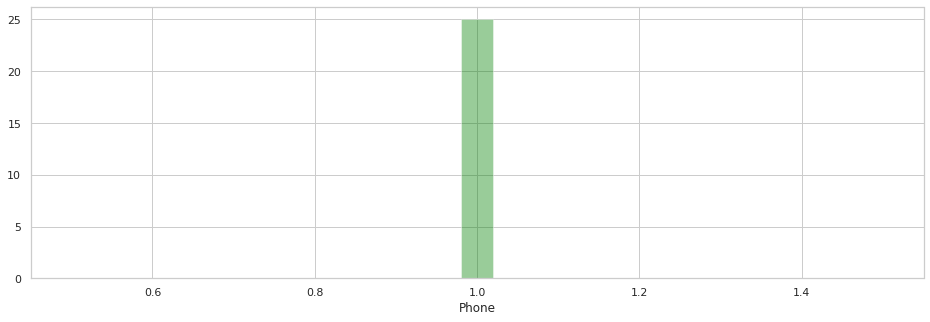

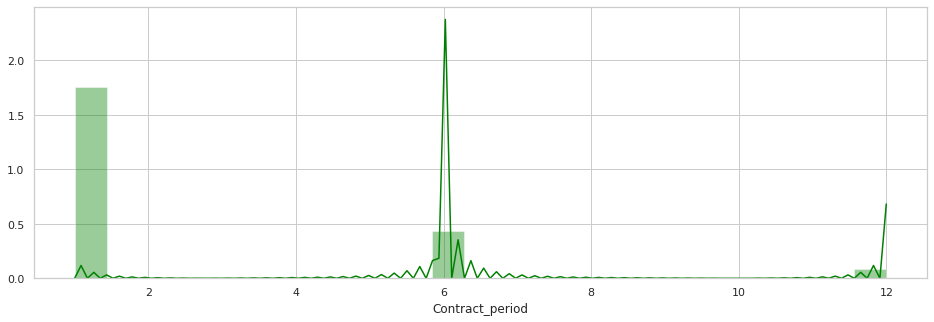

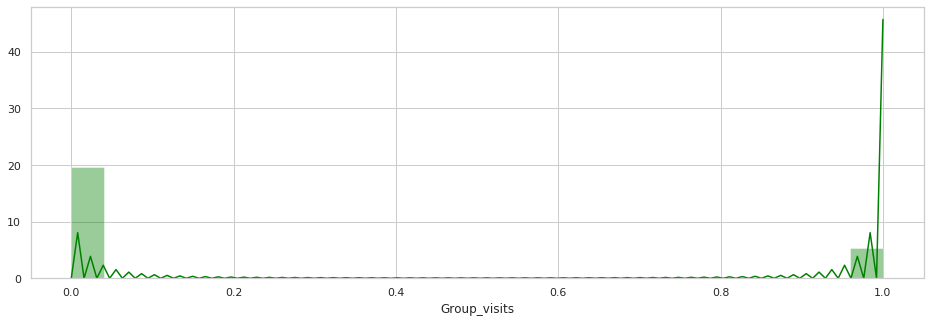

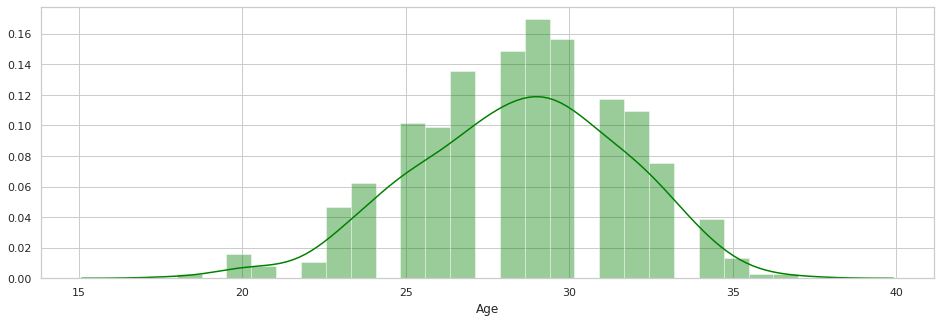

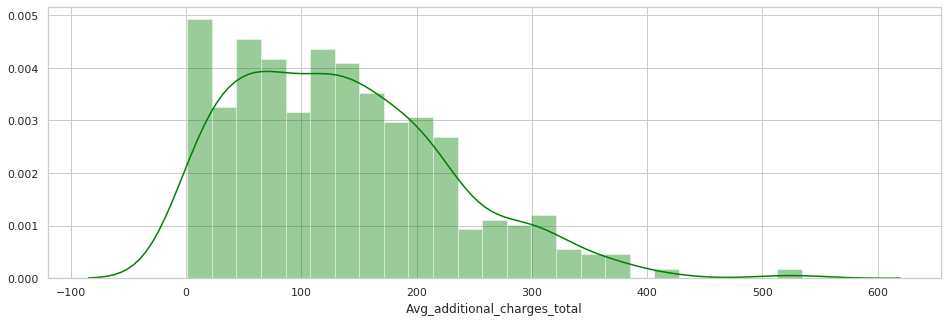

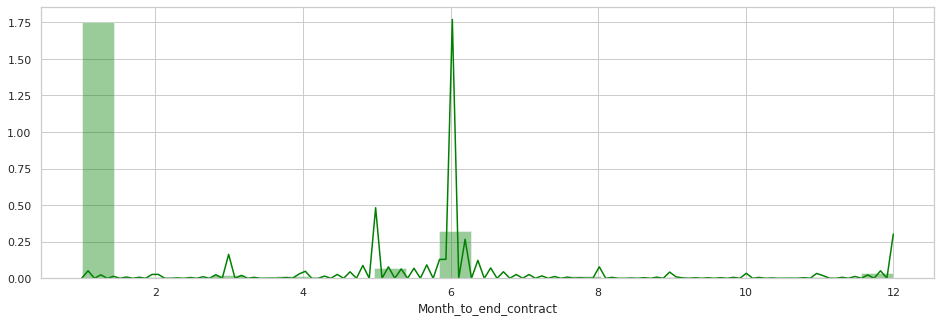

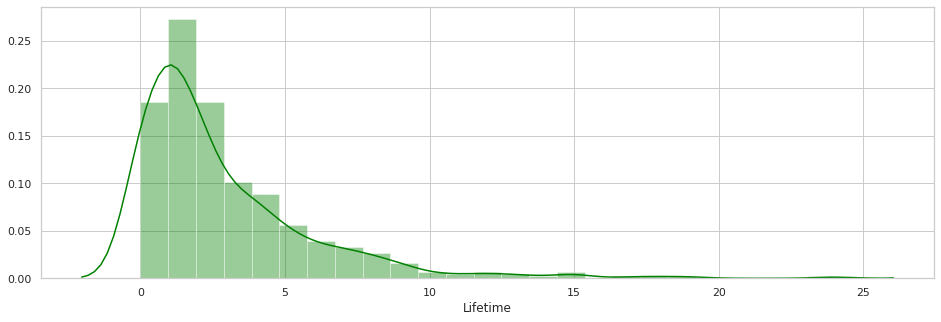

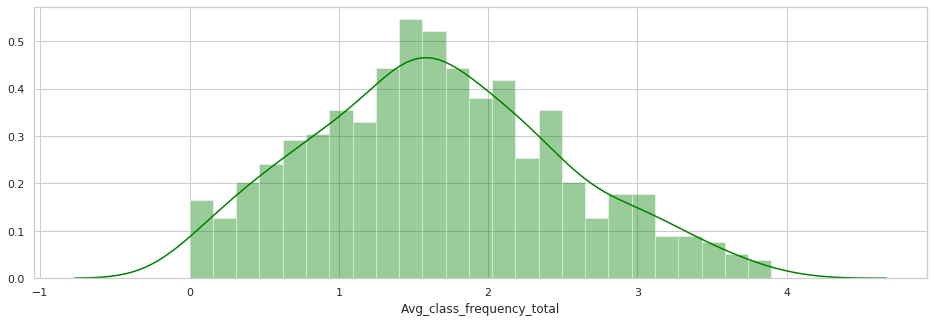

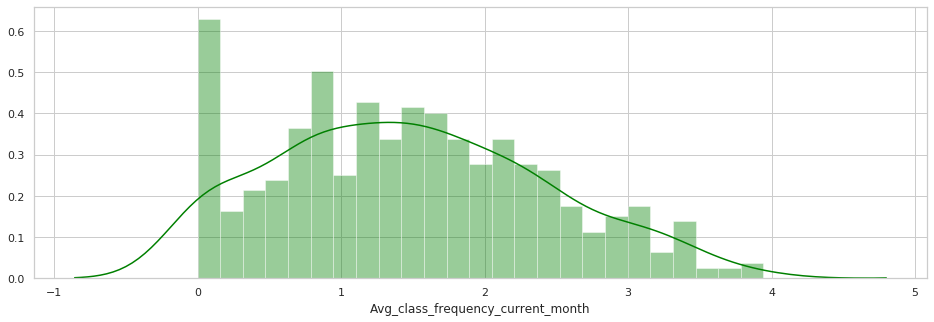

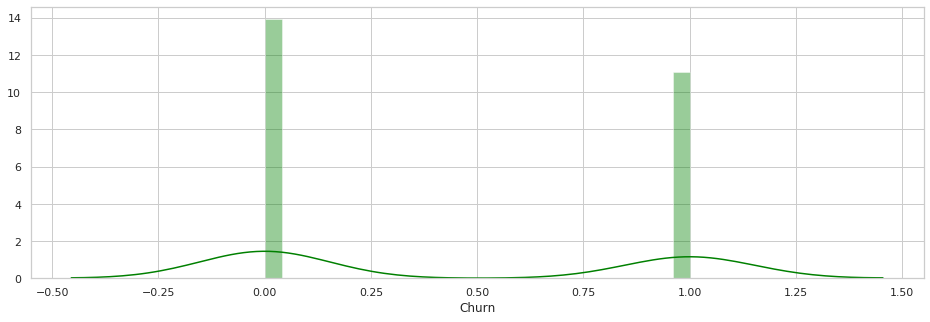

In [40]:
print('Plot distributions of features for cluster 2')
plot_features_cluster(df_data, 2)

Plot distributions of features for cluster 3


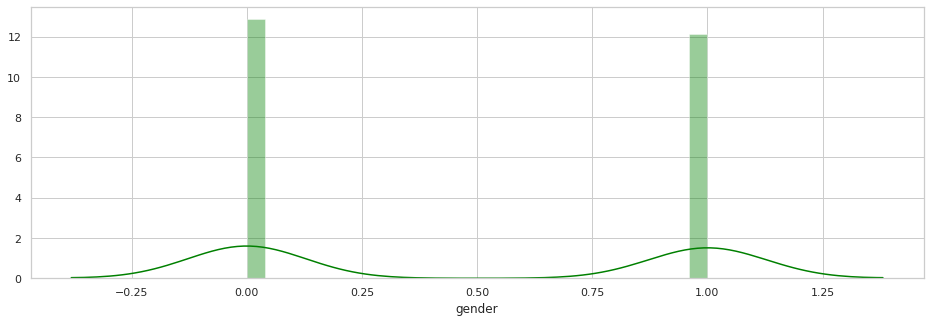

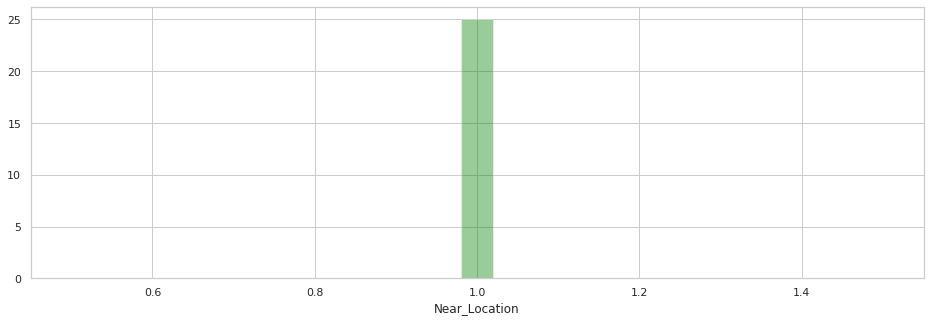

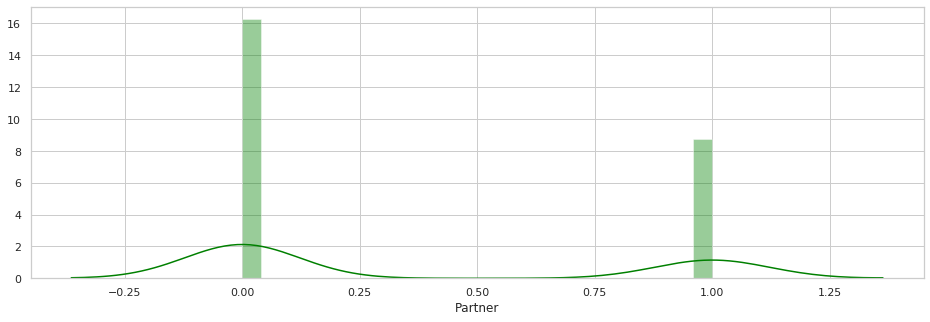

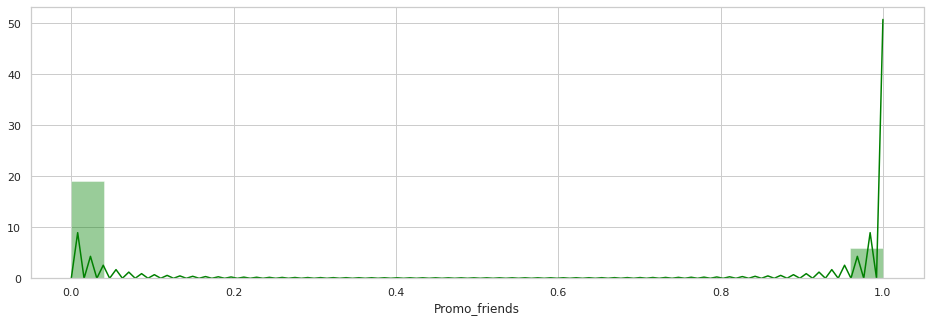

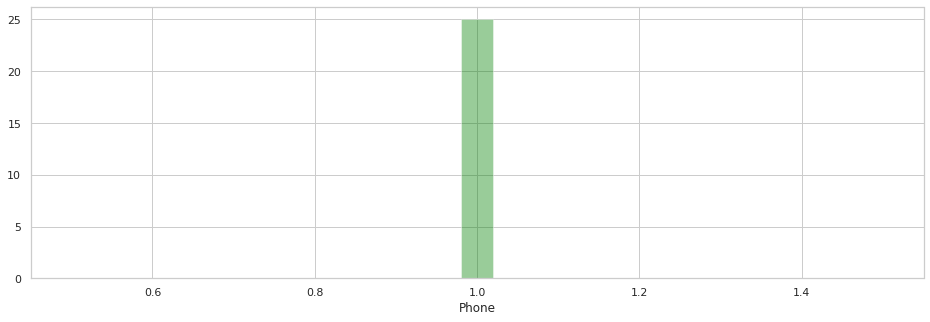

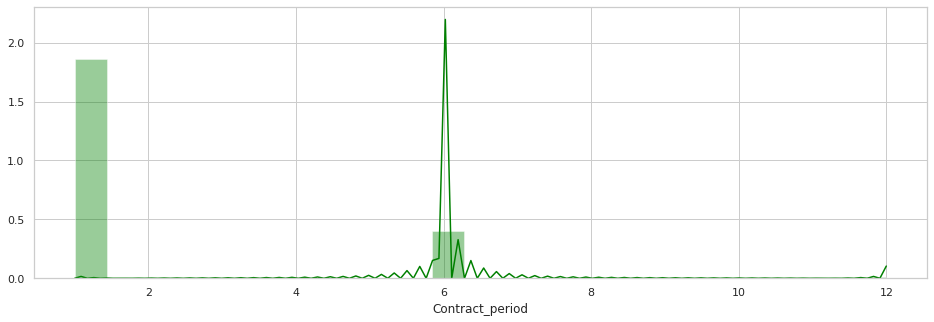

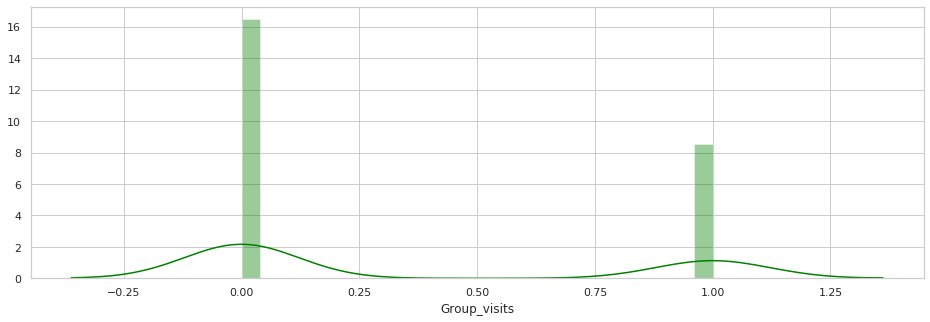

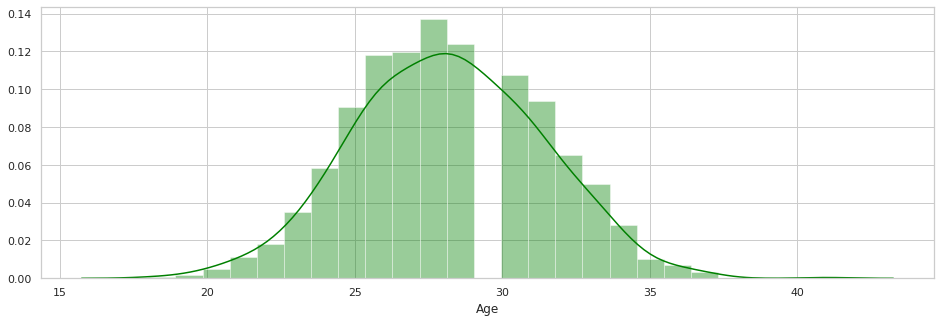

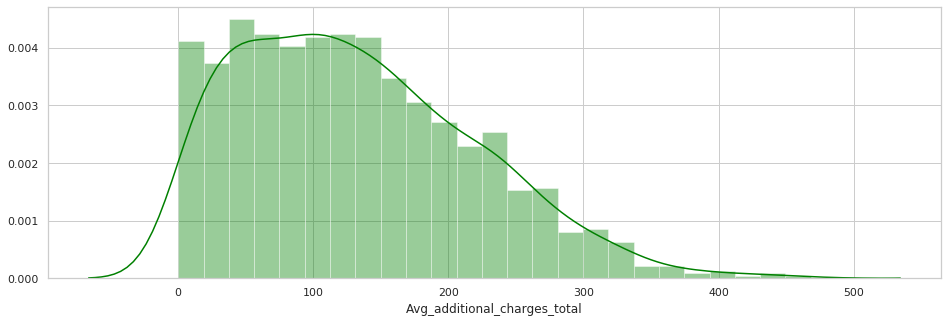

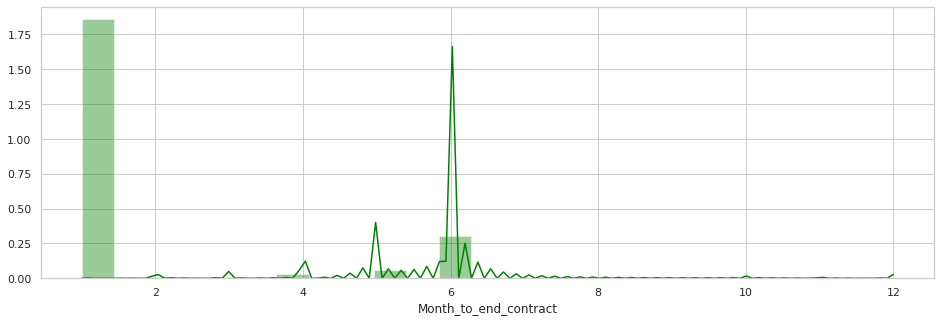

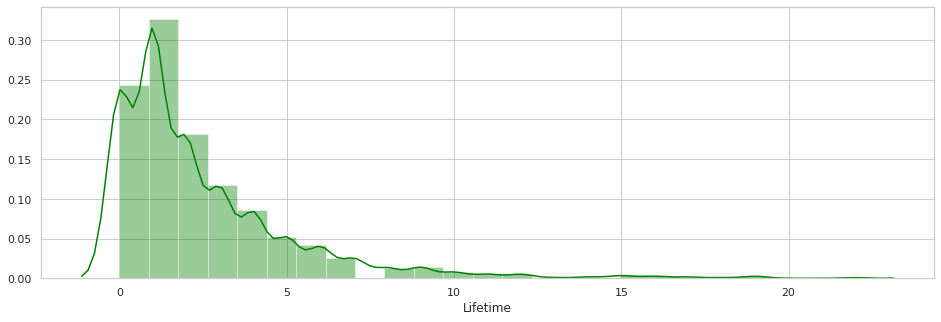

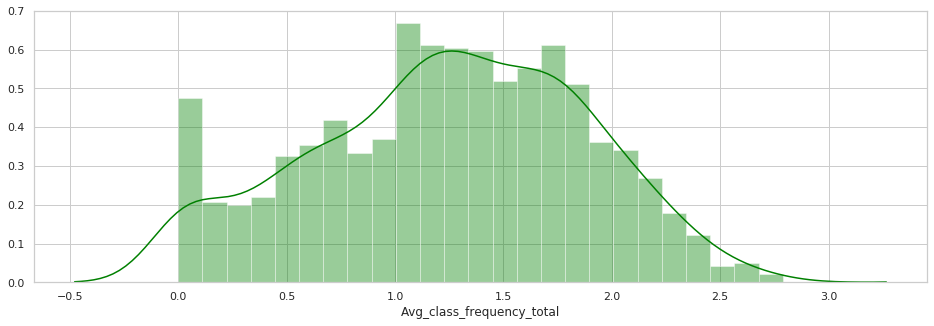

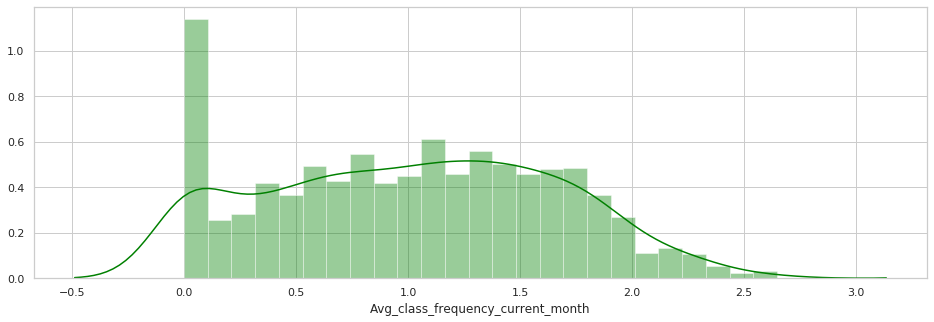

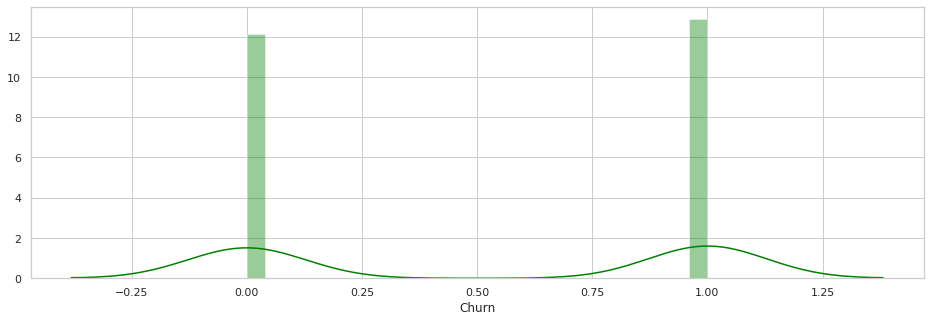

In [41]:
print('Plot distributions of features for cluster 3')
plot_features_cluster(df_data, 3)

Plot distributions of features for cluster 4


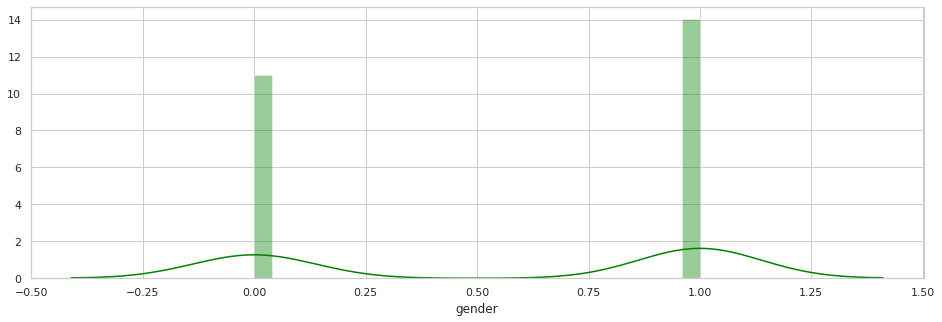

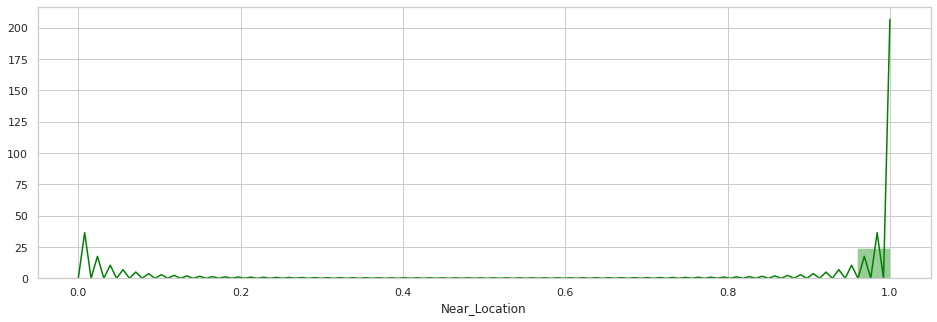

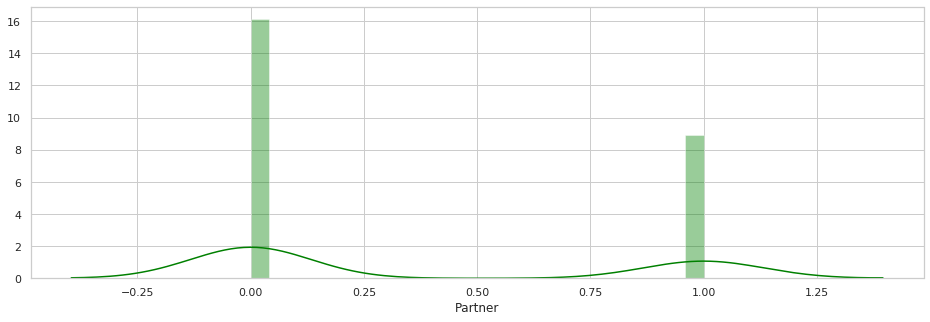

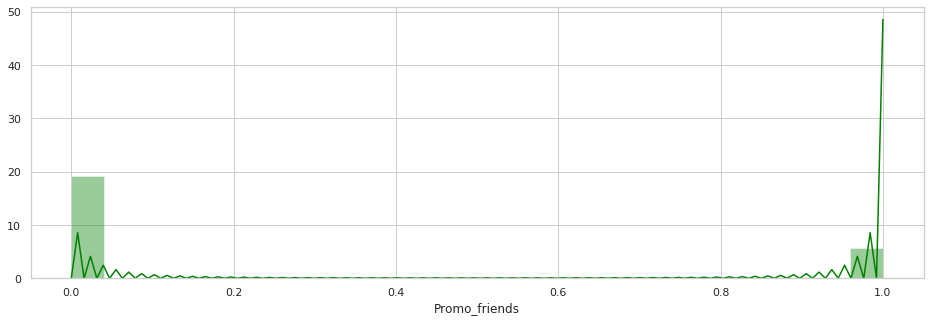

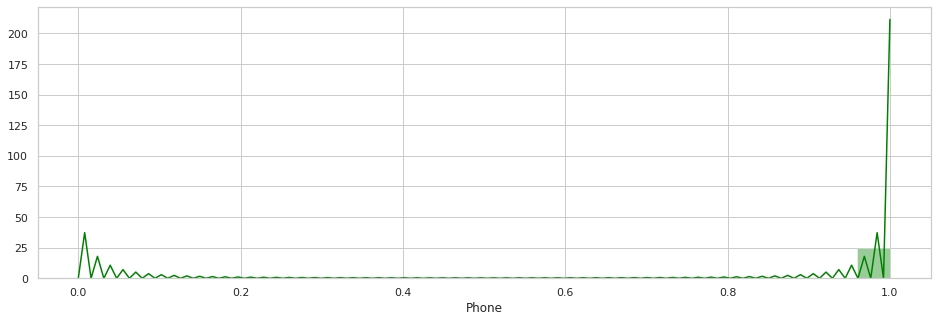

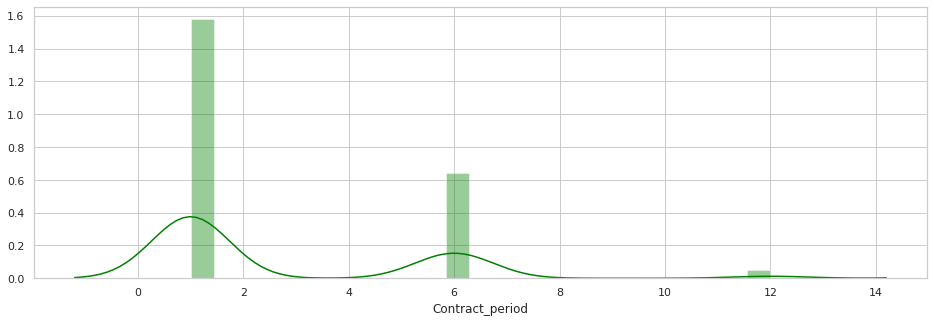

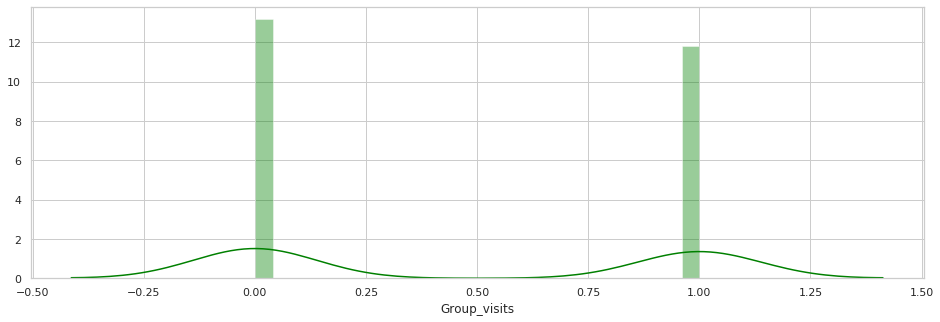

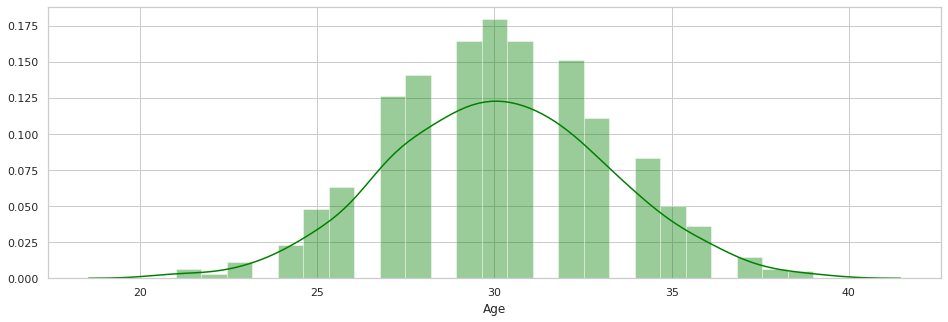

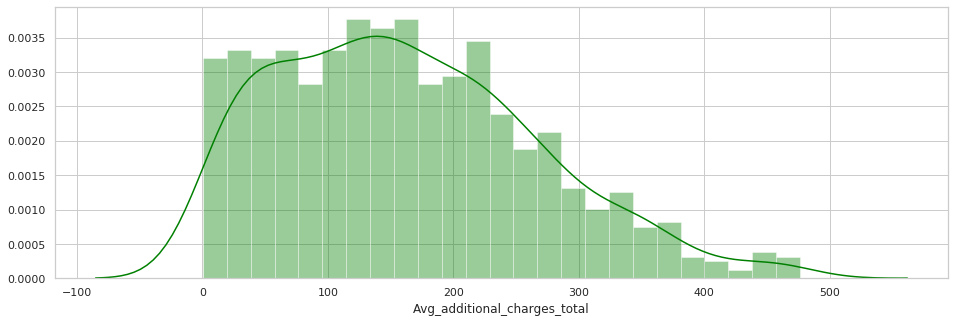

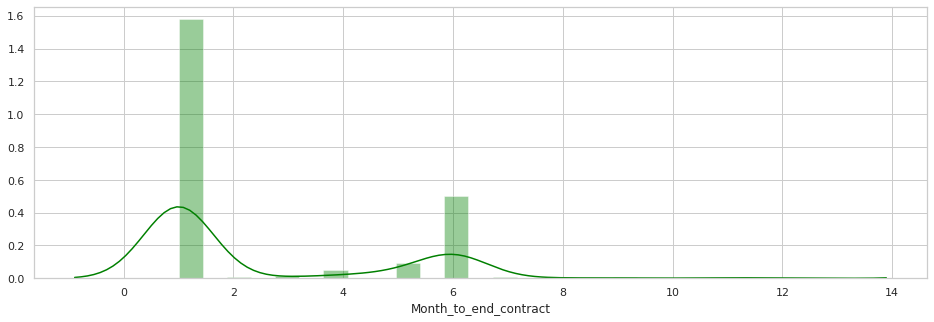

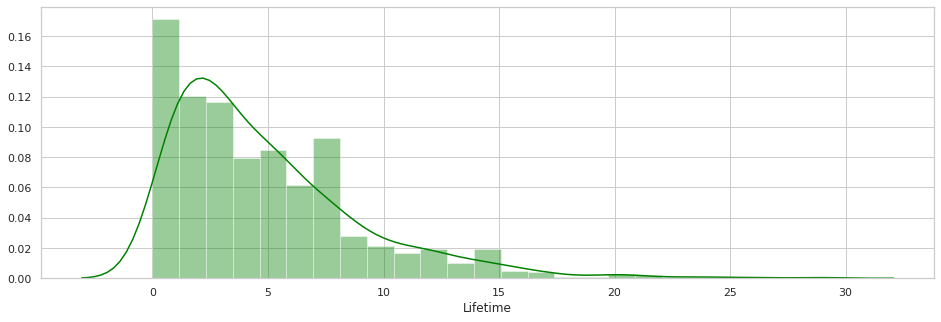

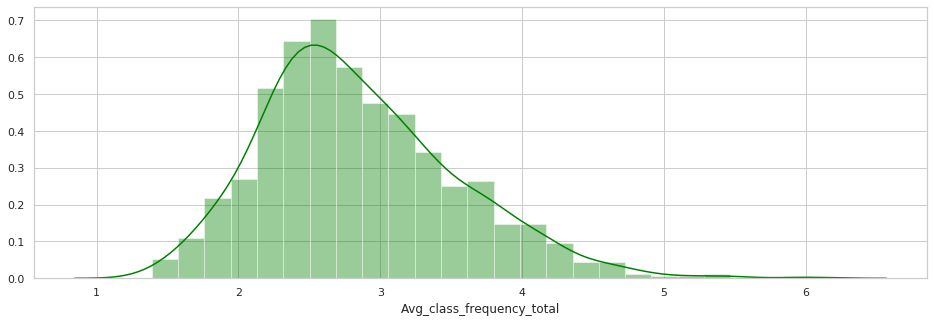

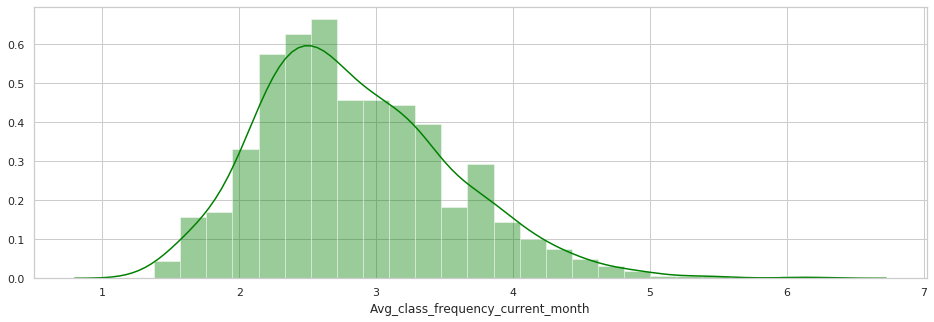

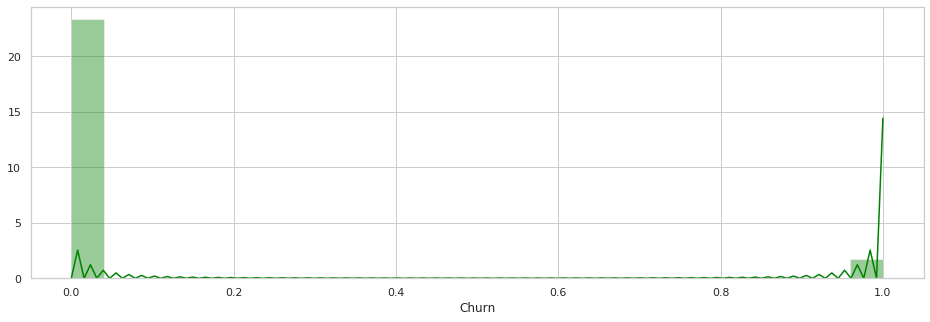

In [42]:
print('Plot distributions of features for cluster 4')
plot_features_cluster(df_data, 4)

> * In cluster 3 almost 51% of users stop going to the gym. 
> * After applying the clustering algorithm, now each cluster has clearly defined indicators of features.

In [43]:
df_data.groupby(['km_cluster'])['Churn'].value_counts(normalize=True)

km_cluster  Churn
0           0        0.972305
            1        0.027695
1           0        0.732468
            1        0.267532
2           0        0.556436
            1        0.443564
3           1        0.514263
            0        0.485737
4           0        0.931900
            1        0.068100
Name: Churn, dtype: float64

> * Based on these data, we can see that in the **0 and 4th clusters**, the number of people who are loyal to the fitness center is more than 97% and 93%.
> * The next is **cluster number 1**, with 73% of people who did not leave.
> * Clusters **2th and 3th** with (55% and 51%) of people who continue to visit the fitness center.
> * The most interesting is **cluster 3**, in which almost half of the users are not loyal to the fitness center and stop attending gym.

#### Step 5. Come up with conclusions and basic recommendations on working with customers <a name="Conclusion"></a>

   Based on the previous data, the following conclusions can be drawn.
> * The most problematic cluster, in terms of churn, is cluster 3. In this cluster, almost half of the users stop attending the gym. This cluster differs in that it has the lowest frequency of visits for the week of the client's life cycle and for the current month. Also the lowest indicator of the number of months before the end of the contract - 1.8 months. Lowest price tag for extra gym services ($ 131). The average age is also the smallest of all the clusters - 28 years. The minimum contract period is 1.9 months. In this cluster, the minimum number of users who are employees of partner companies is 35%.

Recommendations:

> * One of the recommendations would be to make a survey (for example, for a free energy cocktail) among the users of this cluster in order to find out the companies in which they, the users work. Thus, it was possible to consider the possibility of concluding partnership contracts with these companies, then these users will receive discounts on visits to the fitness center.
> * We can offer to make discounts on annual subscriptions for users from this cluster, with the possibility of renewal at a preferential price.
> * One of the options may be that the user is offered a gameplay: every 2nd workout gives minus 1% for the next  month. Thus, you can try to stimulate a person to visit people for further discounts.